## Gráficos Infraestrutura urbana e AGSN

#### Plots: DF_Prop_Pop_Sem_Infraestrutura_91_10_AL_BA_PE

Gráfico Comparado % Populção em domicílios com infraestrurura

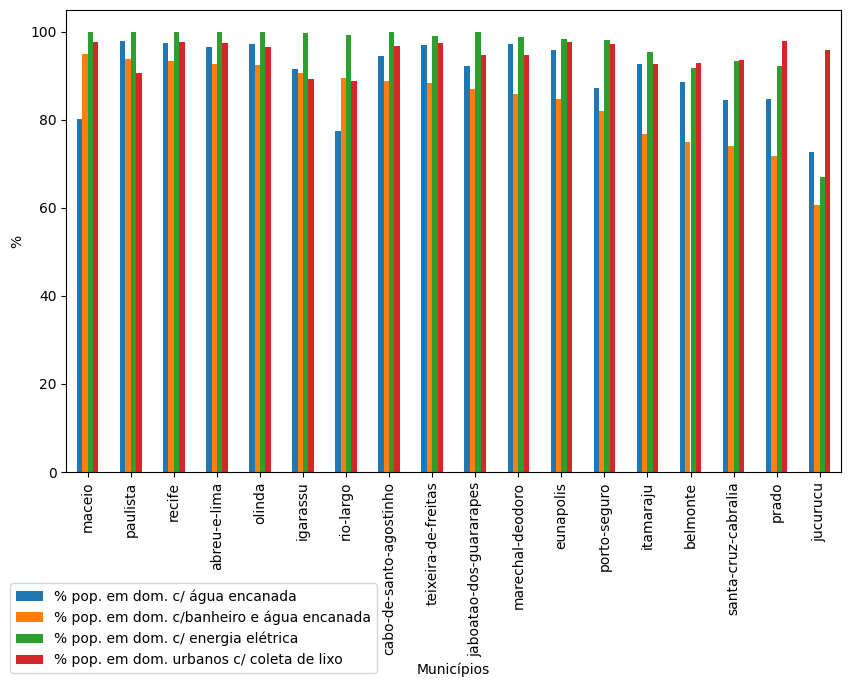

In [ ]:
# Gráfico:
# '% da população em domicílios com água encanada 2010', 
# '% da população que vive em domicílios com banheiro e água encanada 2010',
# '% de pessoas em domicílios com energia elétrica 2010',  
# '% de pessoas em domicílios urbanos com coleta de lixo 2010',  


df = DF_Prop_Pop_Sem_Infraestrutura_91_10_AL_BA_PE.copy()

var1 = '% da população em domicílios com água encanada 2010'
var2 = '% da população que vive em domicílios com banheiro e água encanada 2010'                                       
var3 = '% de pessoas em domicílios com energia elétrica 2010'
var5 = '% de pessoas em domicílios urbanos com coleta de lixo 2010'
cols = [var1, var2, var3, var5]

# Resume df necessário
df = df[['nome_municipio', var1, var2, var3, var5]]
df = df[df['nome_municipio'].isin(Municipios)]

# Converte dtype das colunas para números
df[cols] = df[cols].apply(lambda x: pd.to_numeric(x, errors = 'coerce'))

# Renomeia nomes de colunas adicionando quebra de linhas
new_var1 = '% pop. em dom. c/ água encanada'
new_var2 = '% pop. em dom. c/banheiro e água encanada'                                       
new_var3 = '% pop. em dom. c/ energia elétrica'
new_var4 = '% pop. em dom. c/ densidade > a 2 pessoas p/ dorm.'
new_var5 = '% pop. em dom. urbanos c/ coleta de lixo'
new_var6 = '% pop. em dom. c/ paredes que não sejam de alvenaria ou madeira aparelhada'

df.rename({
        var1: new_var1,
        var2: new_var2,
        var3: new_var3,
        var5: new_var5
        }, axis = 1, inplace = True)
cols = [new_var1, new_var2, new_var3, new_var5]

# Reordena colunas
df = df.sort_values(new_var2, ascending = False)

df.plot(
        x = 'nome_municipio',
        y = cols,
        kind = 'bar',
        legend = True
        )
plt.xlabel('Municípios')
plt.ylabel('%')
# plt.legend(loc='best', prop = {'size' :9})
plt.legend(bbox_to_anchor=(0.41,-0.45), loc='lower right')

save_graph('Bar_% Populção em domicílios com infraestrurura 2010', 'Municipios')

Gráfico Municipal % Populção em domicílios com infraestrurura 2000 x 2010 (O.K.)

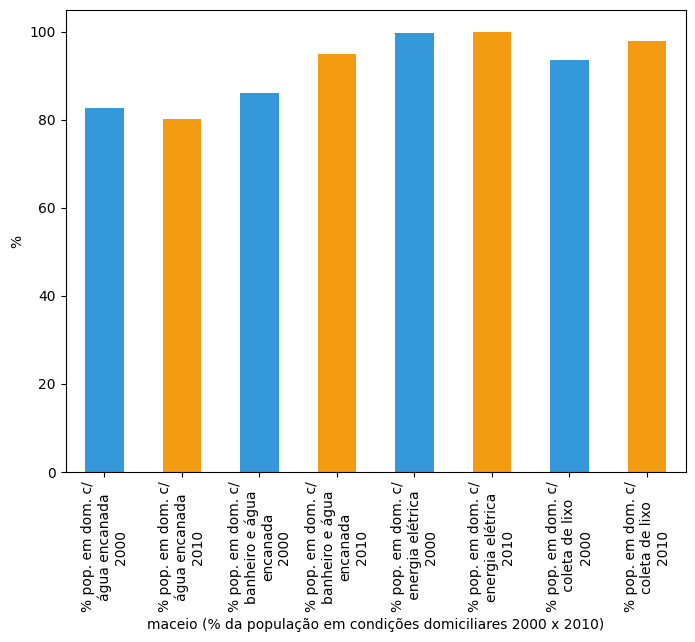

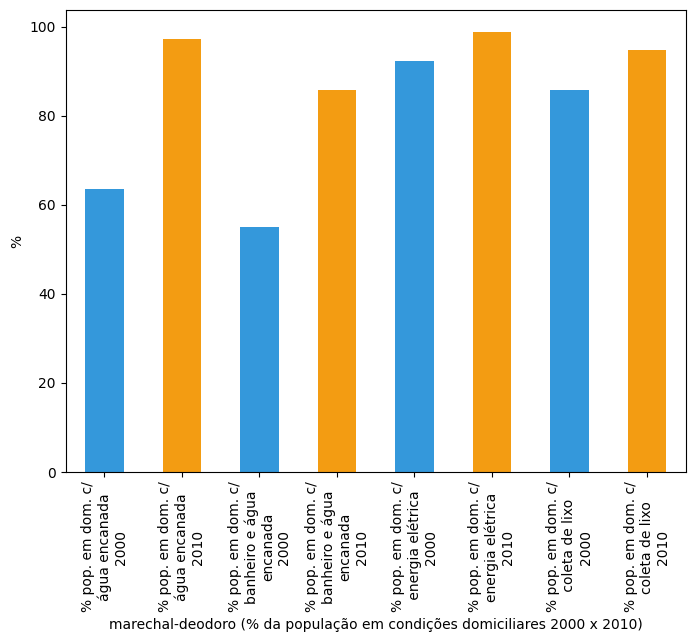

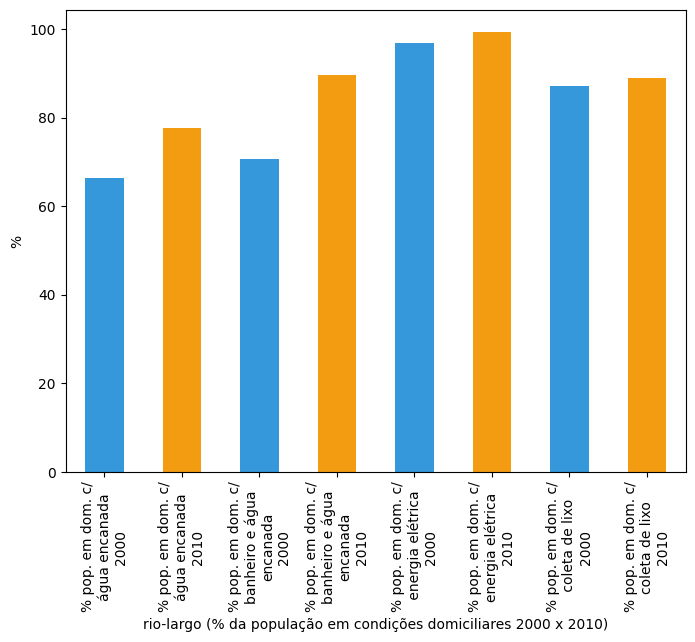

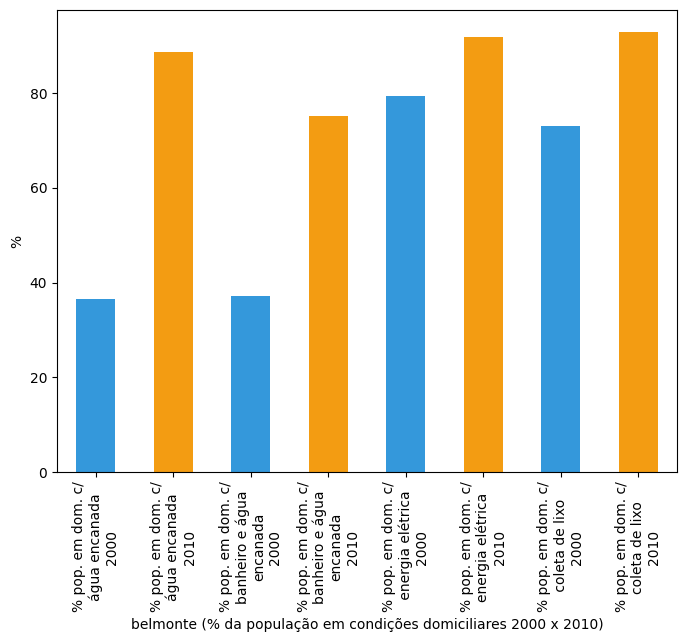

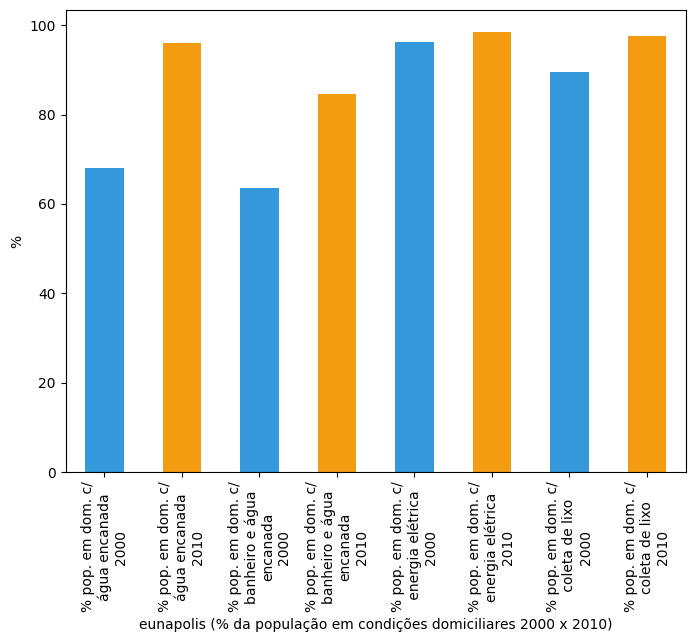

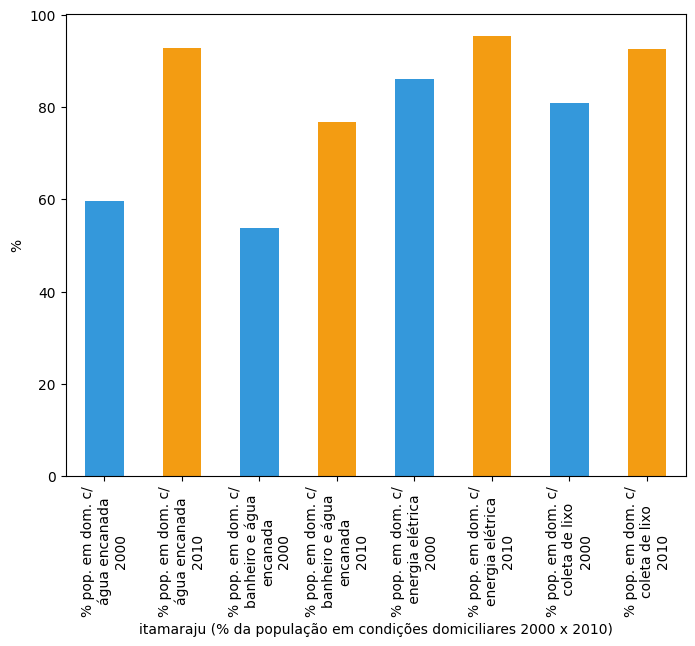

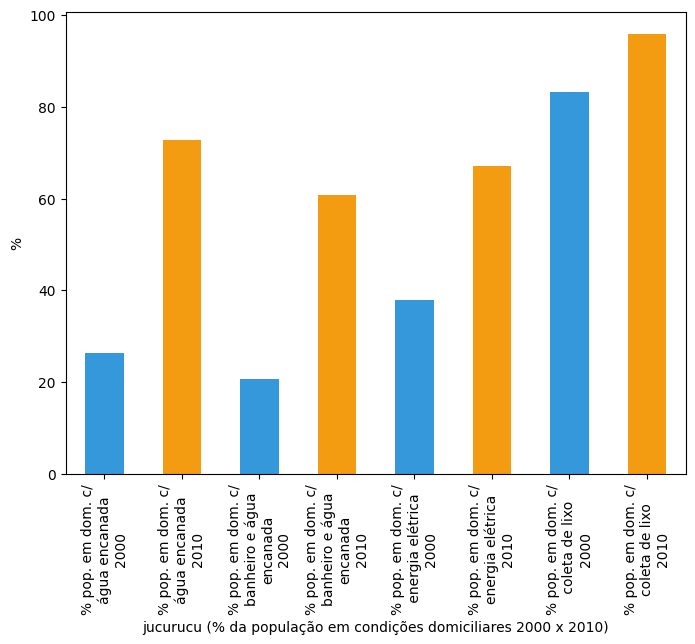

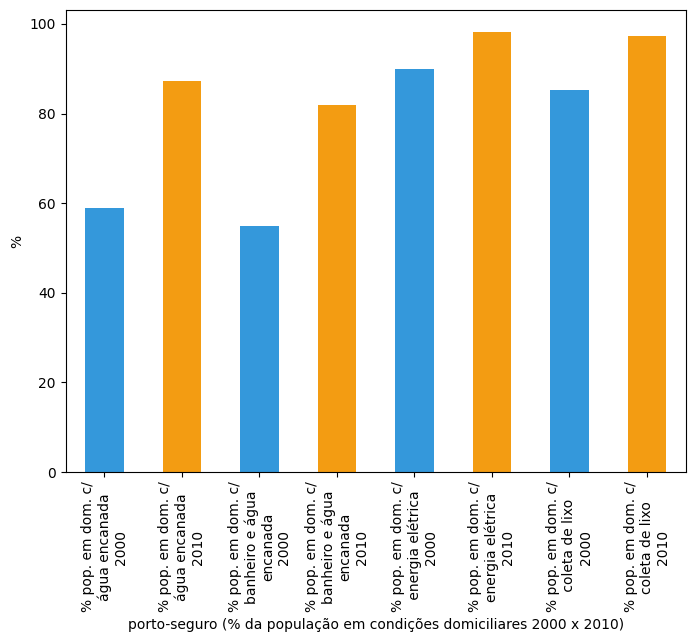

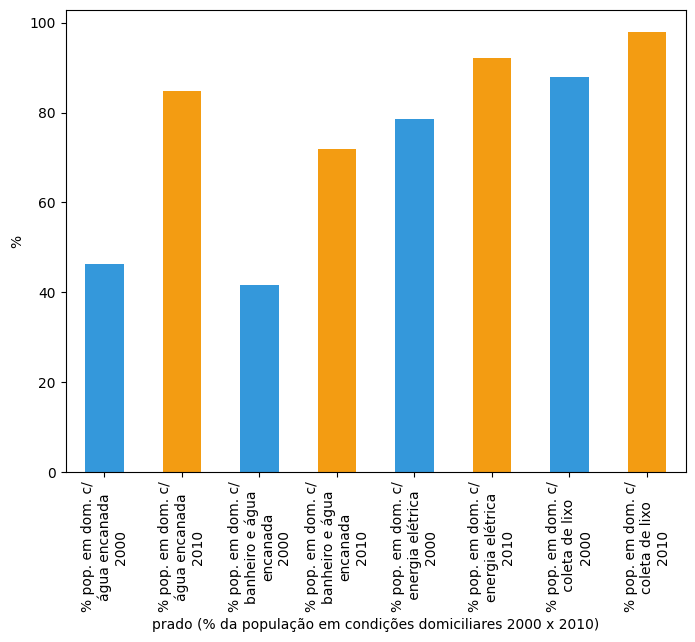

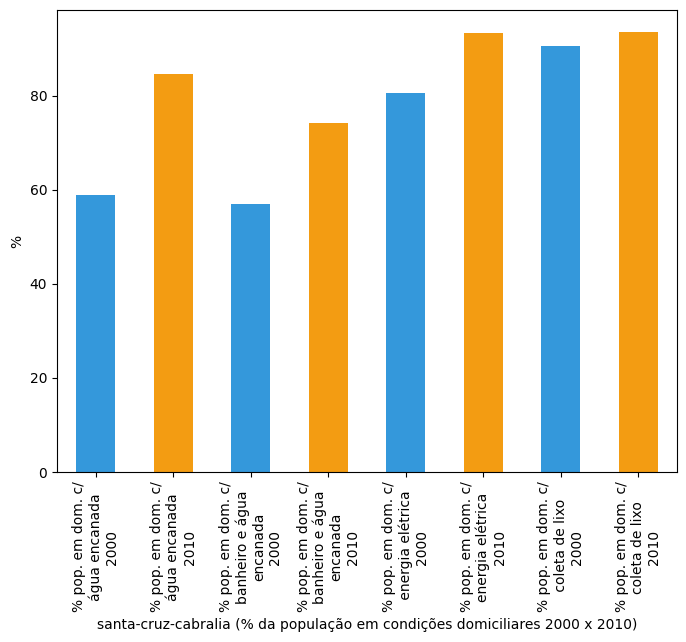

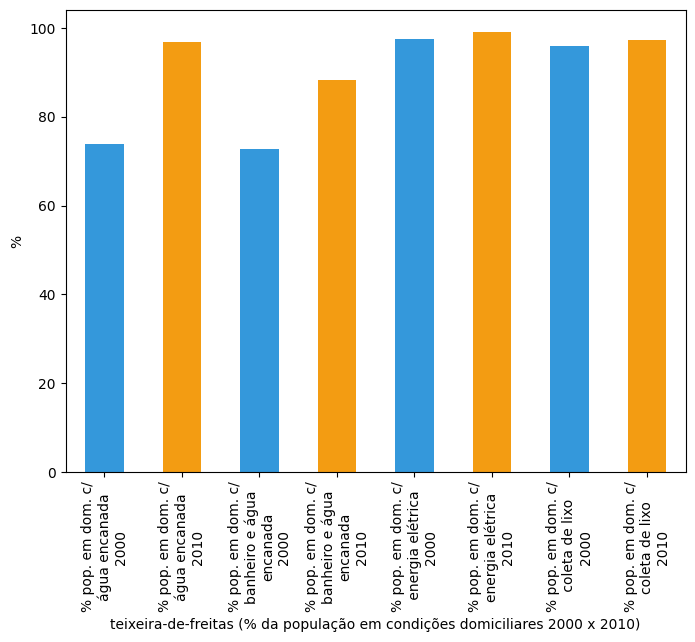

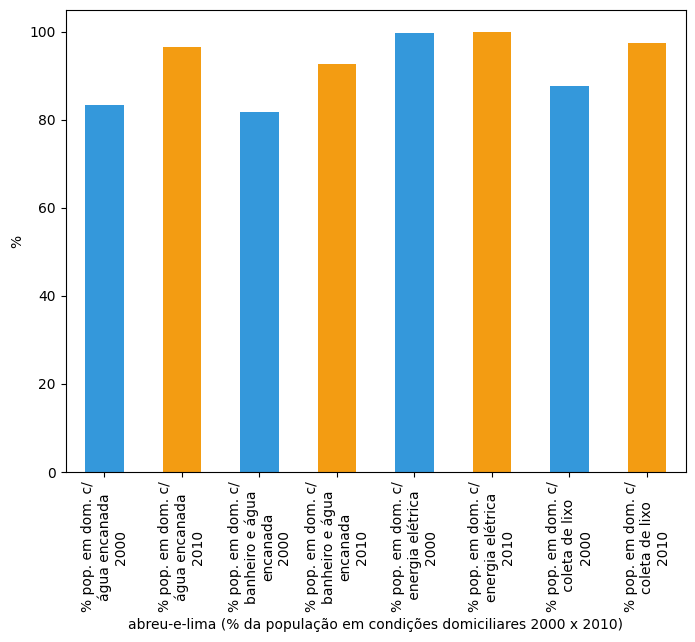

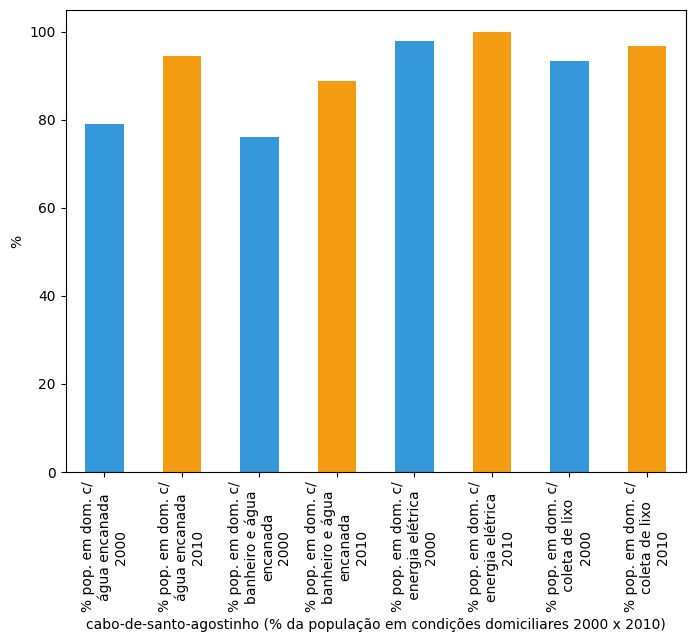

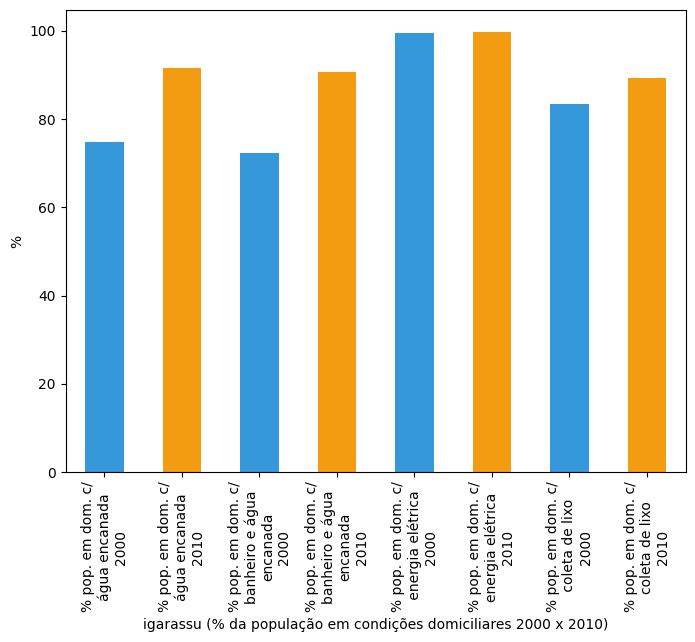

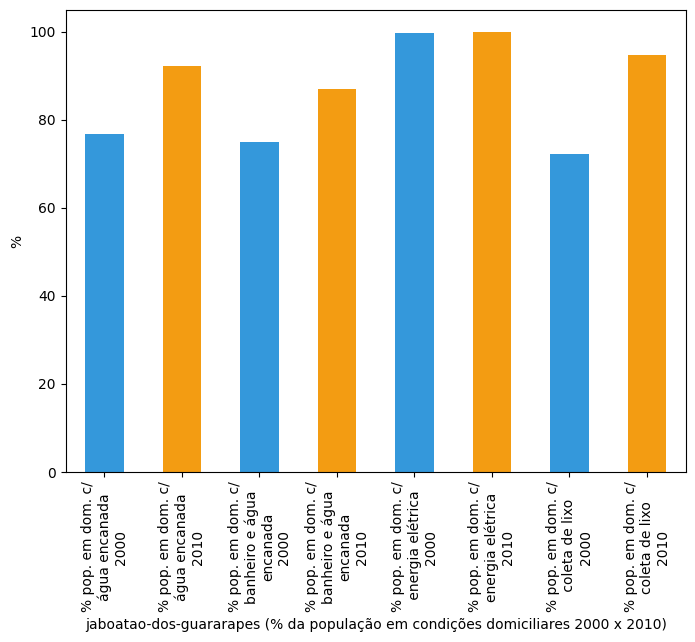

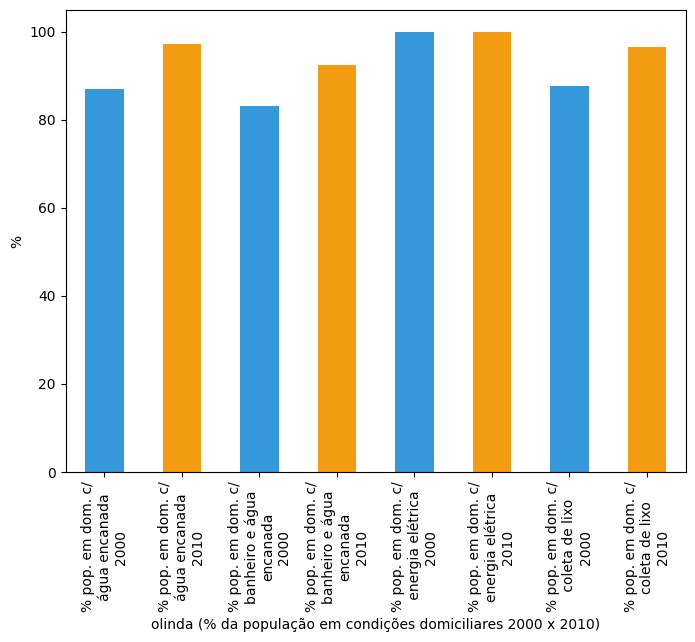

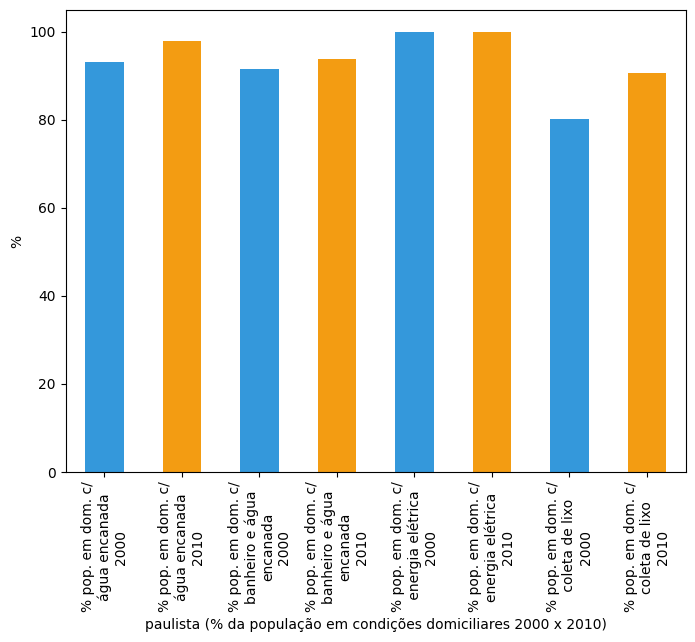

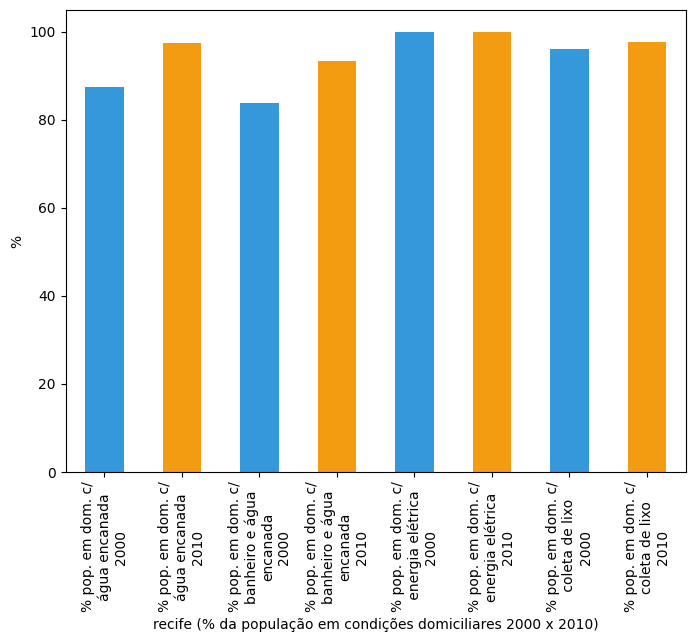

In [ ]:
# Gráfico: 
# '% da população em domicílios com água encanada 2010'
# '% da população em domicílios com água encanada 2000'
# '% da população que vive em domicílios com banheiro e água encanada 2010'
# '% da população que vive em domicílios com banheiro e água encanada 2000'
# '% de pessoas em domicílios com energia elétrica 2010'
# '% de pessoas em domicílios urbanos com coleta de lixo 2010'
# '% de pessoas em domicílios urbanos com coleta de lixo 2000'

df = DF_Prop_Pop_Sem_Infraestrutura_91_10_AL_BA_PE.copy()

var1 = '% da população em domicílios com água encanada 2010'
var11 = '% da população em domicílios com água encanada 2000'
var2 = '% da população que vive em domicílios com banheiro e água encanada 2010'
var22 = '% da população que vive em domicílios com banheiro e água encanada 2000'
var3 = '% de pessoas em domicílios com energia elétrica 2010'
var33 = '% de pessoas em domicílios com energia elétrica 2000'
var5 = '% de pessoas em domicílios urbanos com coleta de lixo 2010'
var55 = '% de pessoas em domicílios urbanos com coleta de lixo 2000'

cols = [var11, var1, var22, var2, var33, var3, var55,  var5]

# Resume df necessário
df = df[['nome_municipio', var11, var1, var22, var2, var33, var3, var55,  var5]]
df = df[df['nome_municipio'].isin(Municipios)]

# Converte dtype das colunas para números
df[cols] = df[cols].apply(lambda x: pd.to_numeric(x, errors = 'coerce'))

# Renomeia nomes de colunas adicionando quebra de linhas
new_var1  = '% pop. em dom. c/\nágua encanada\n2010'
new_var11 = '% pop. em dom. c/\nágua encanada\n2000'
new_var2  = '% pop. em dom. c/\nbanheiro e água\nencanada\n2010'
new_var22 = '% pop. em dom. c/\nbanheiro e água\nencanada\n2000'
new_var3  = '% pop. em dom. c/\nenergia elétrica\n2010'
new_var33 = '% pop. em dom. c/\n energia elétrica\n2000'
new_var5  = '% pop. em dom. c/\ncoleta de lixo\n2010'
new_var55 = '% pop. em dom. c/\n coleta de lixo\n2000'

df.rename({
var1 : new_var1,
var11: new_var11,
var2 : new_var2,
var22: new_var22,
var3 : new_var3,
var33: new_var33,
var5 : new_var5,
var55: new_var55
        }, axis = 1, inplace = True)

# Define set_munic como apenas os que constam em 'nome_municipio' no df reduzido
set_munic = set(df['nome_municipio'].tolist())

# Define valores das cores das barras para o gráfico
blue   = '#3498db'
yellow = '#f39c12'

# Loop produz gráficos para cada município no DF
for munic in Municipios:
        dfx = df

        # Filter df with munic
        dfx = dfx[dfx['nome_municipio'] == munic]
        dfx.set_index('nome_municipio')

        # Define colors for the bars
        colors = [blue, yellow] * 4

        # Plot the bar graph
        ax = dfx.iloc[0, 1:].plot(kind='bar', color=colors, figsize=(8, 6))

        # Set the x and y axis labels
        ax.set_xlabel(f'{munic} (% da população em condições domiciliares 2000 x 2010)')
        ax.set_ylabel('%')

        # Save plot to save_path
        plt.savefig(f'{save_path}\\Bar_% da população em condições domiciliares 2000 x 2010_{munic}', dpi = 300, bbox_inches='tight' )

        # Show the plot
        plt.show()
 

Gráfico Comparado % Populção em domicílios precários

In [ ]:
# Unindo DFs DF_Prop_Pop_Sem_Infraestrutura_91_10_AL_BA_PE e DF_Prop_Pop_Domicílios_Precários_91_10_AL_BA_PE

DF_Domic_Prec = pd.merge(
                        DF_Prop_Pop_Sem_Infraestrutura_91_10_AL_BA_PE, 
                        DF_Prop_Pop_Domicílios_Precários_91_10_AL_BA_PE,
                        how = 'inner',
                        on = 'nome_municipio',
                        suffixes = ('', 'remove_'))



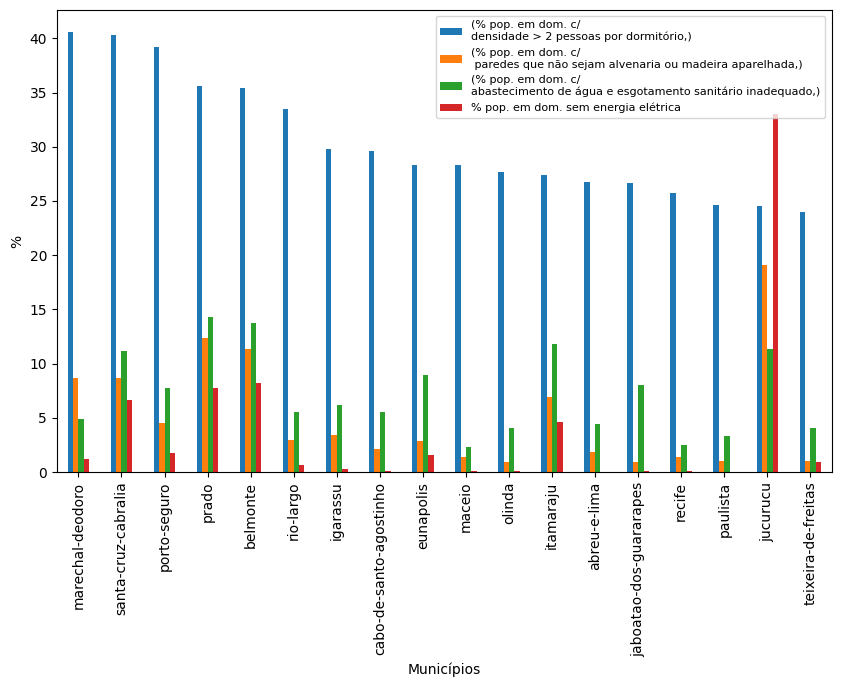

In [ ]:
# Gráfico Comparado DF_Domic_Prec:
# '% da população que vive em domicílios com densidade superior a 2 pessoas por dormitório 2010'
# '% de pessoas em domicílios com abastecimento de água e esgotamento sanitário inadequados 2010'
# '% de pessoas em domicílios sem energia elétrica 2010'
# '% de pessoas em domicílios com paredes que não sejam de alvenaria ou madeira aparelhada 2010'


df = DF_Domic_Prec.copy()

var1 = '% da população que vive em domicílios com densidade superior a 2 pessoas por dormitório 2010'
var2 = '% de pessoas em domicílios com paredes que não sejam de alvenaria ou madeira aparelhada 2010'                              
var3 = '% de pessoas em domicílios com abastecimento de água e esgotamento sanitário inadequados 2010'
var5 = '% de pessoas em domicílios sem energia elétrica 2010'
cols = [var1, var2, var3, var5]

# Resume df necessário
df = df[['nome_municipio', var1, var2, var3, var5]]
df = df[df['nome_municipio'].isin(Municipios)]

# Converte dtype das colunas para números
df[cols] = df[cols].apply(lambda x: pd.to_numeric(x, errors = 'coerce'))

# Renomeia nomes de colunas adicionando quebra de linhas
new_var1 = '% pop. em dom. c/\ndensidade > 2 pessoas por dormitório',
new_var2 = '% pop. em dom. c/\n paredes que não sejam alvenaria ou madeira aparelhada',                            
new_var3 = '% pop. em dom. c/\nabastecimento de água e esgotamento sanitário inadequado',
new_var5 = '% pop. em dom. sem energia elétrica'

df.rename({
        var1: new_var1,
        var2: new_var2,
        var3: new_var3,
        var5: new_var5
        }, axis = 1, inplace = True)
cols = [new_var1, new_var2, new_var3, new_var5]

# Reordena colunas
df = df.sort_values(new_var1, ascending = False)

df.plot(
        x = 'nome_municipio',
        y = cols,
        kind = 'bar',
        legend = True
        )
plt.xlabel('Municípios')
plt.ylabel('%')
plt.legend(bbox_to_anchor=(0.74,0.877), loc='center', prop = {'size' : 8})

save_graph('Bar_% Populção em domicílios precários 2010', 'Municipios')

Gráfico Municipal % Populção em domicílios precários 2000 x 2010 (O.K.)

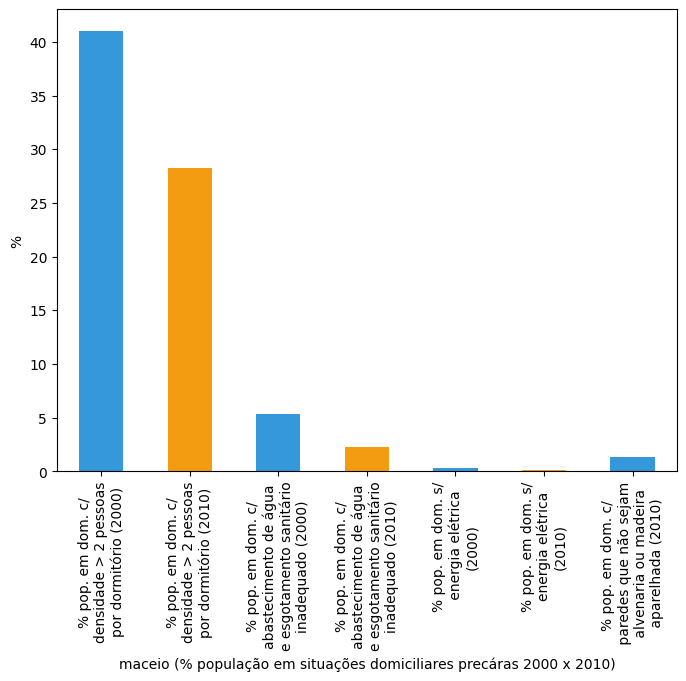

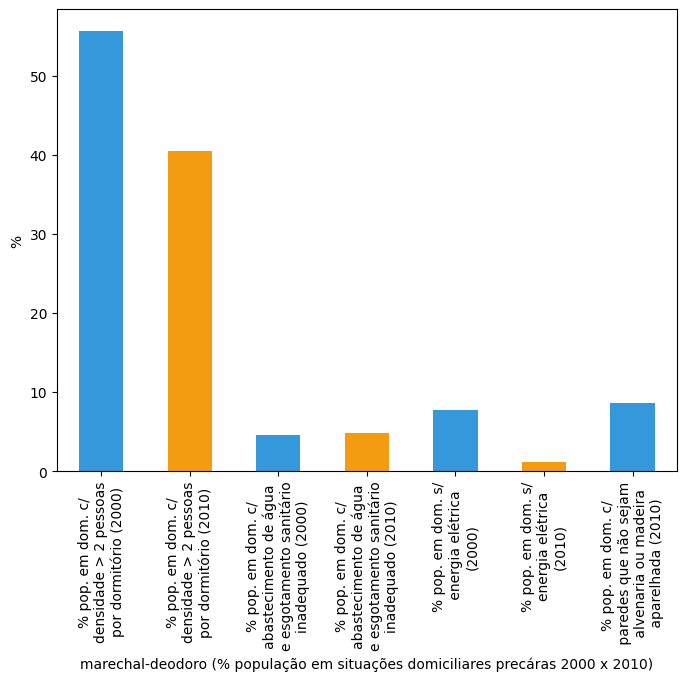

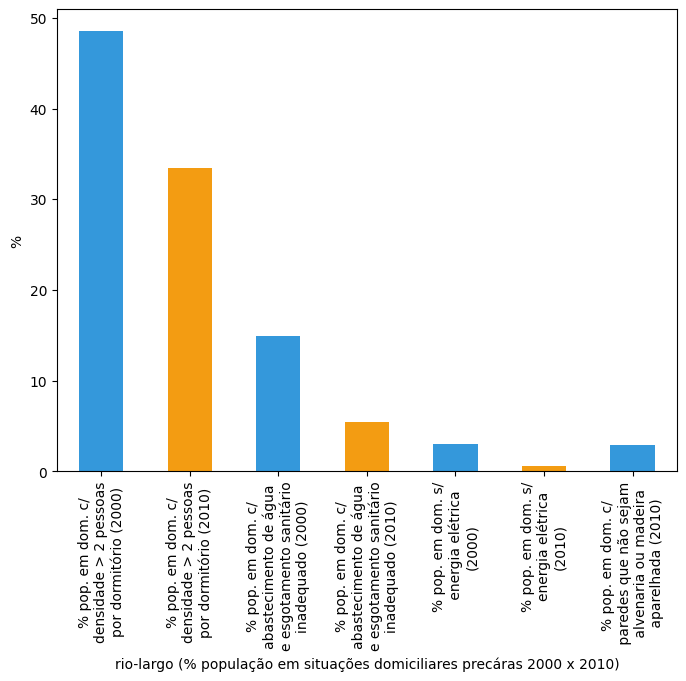

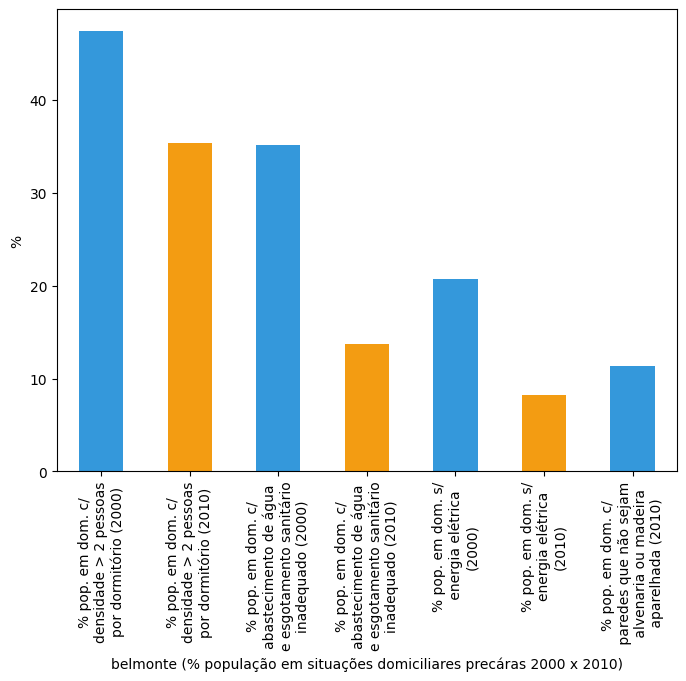

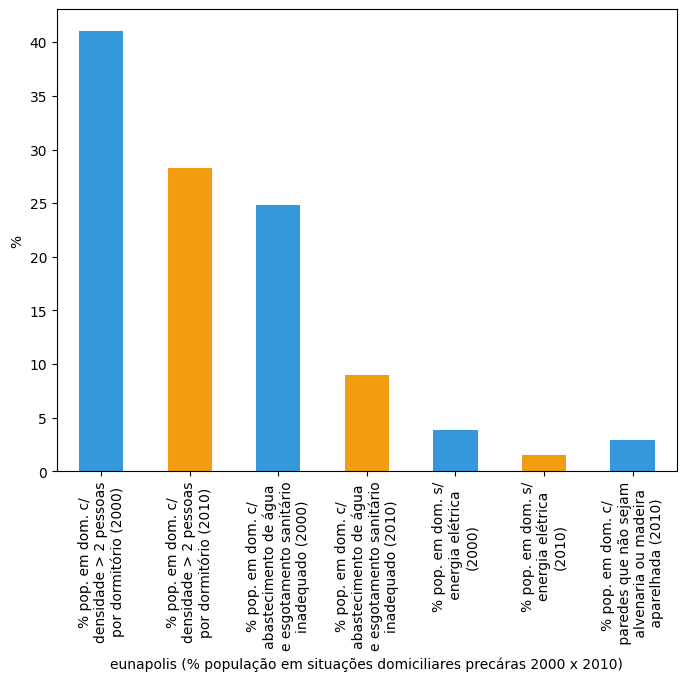

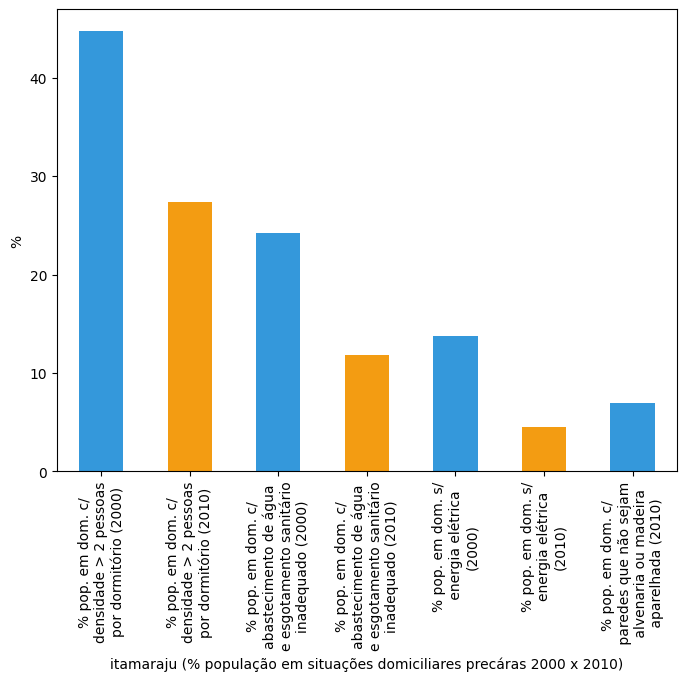

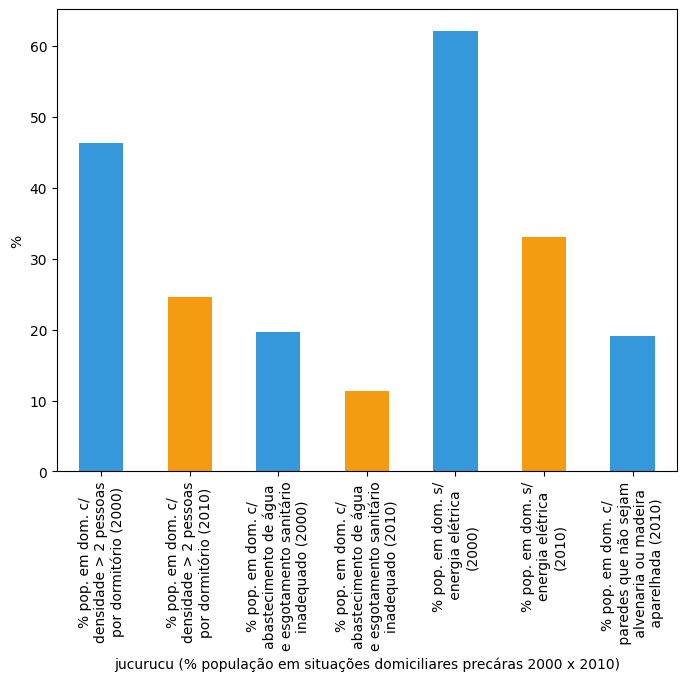

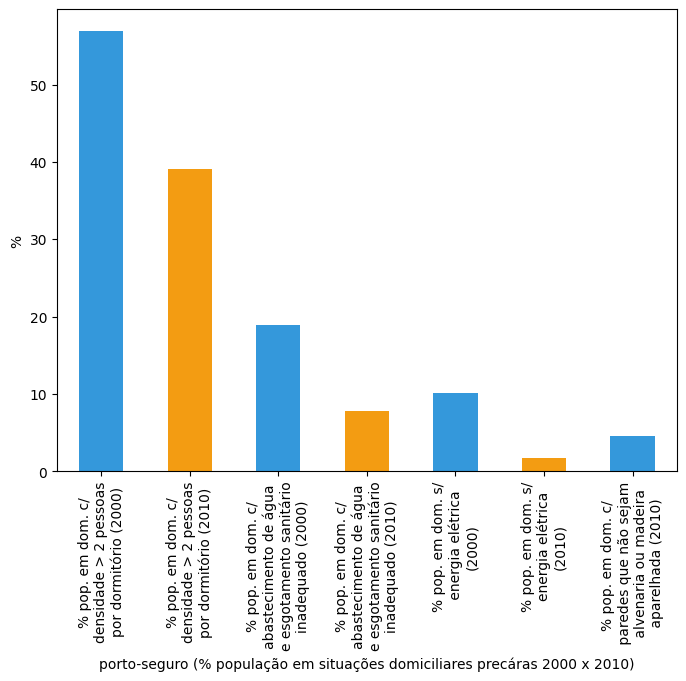

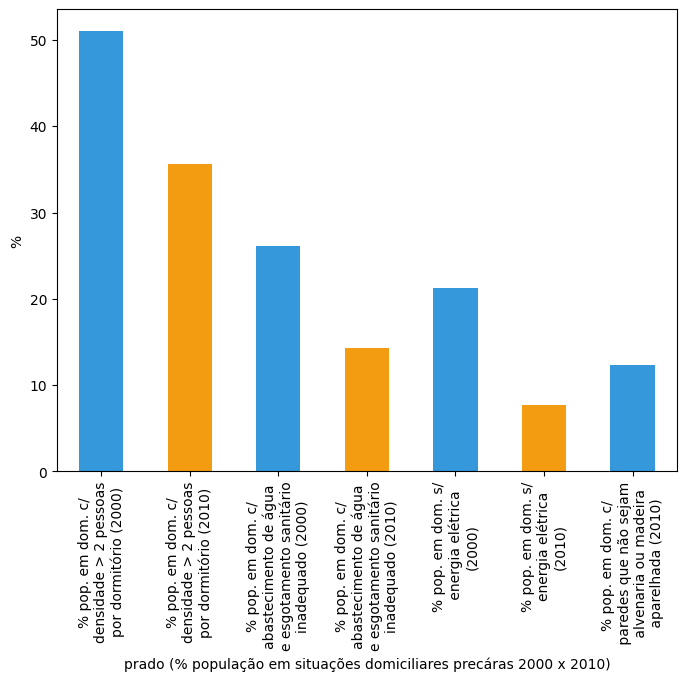

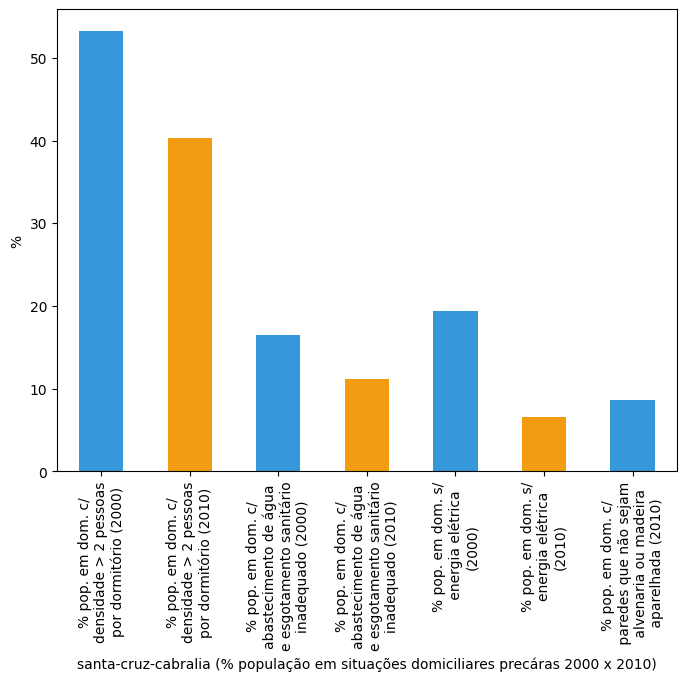

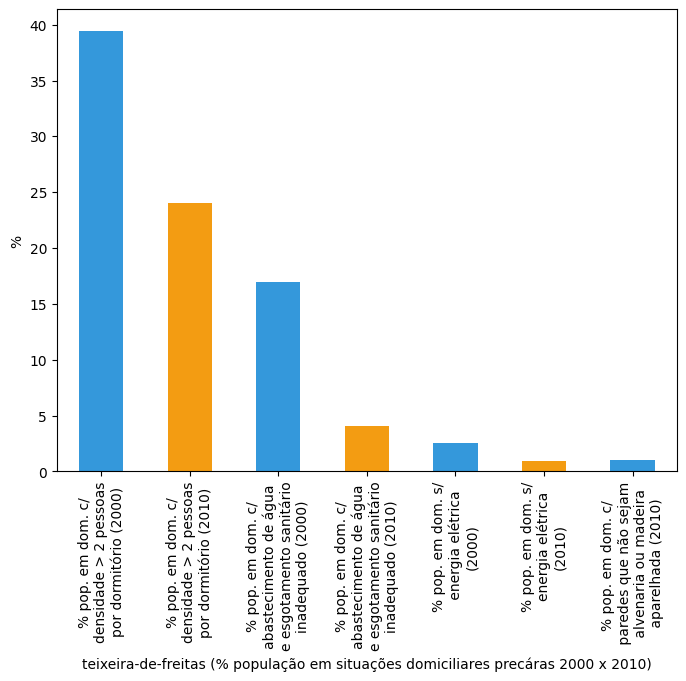

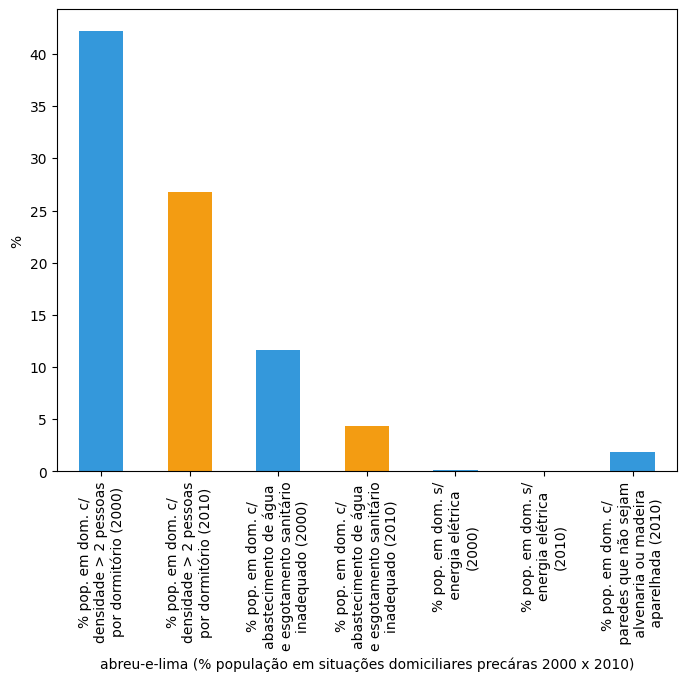

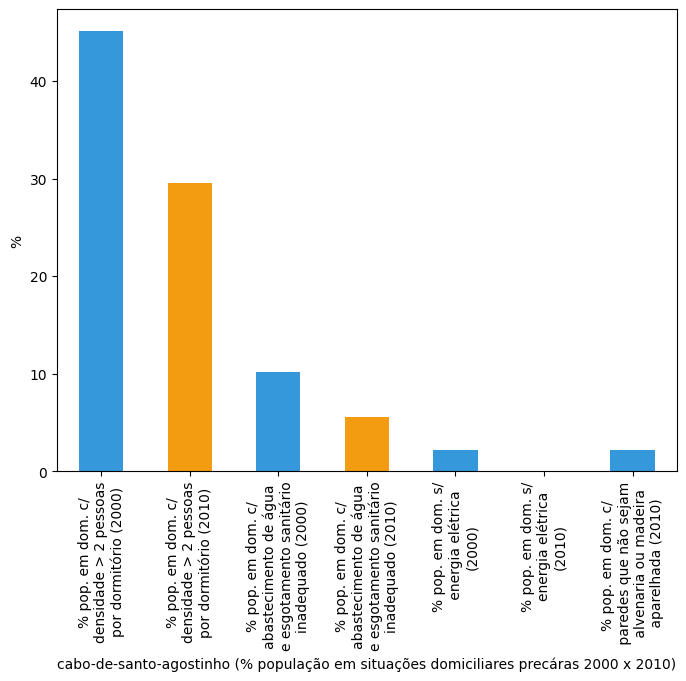

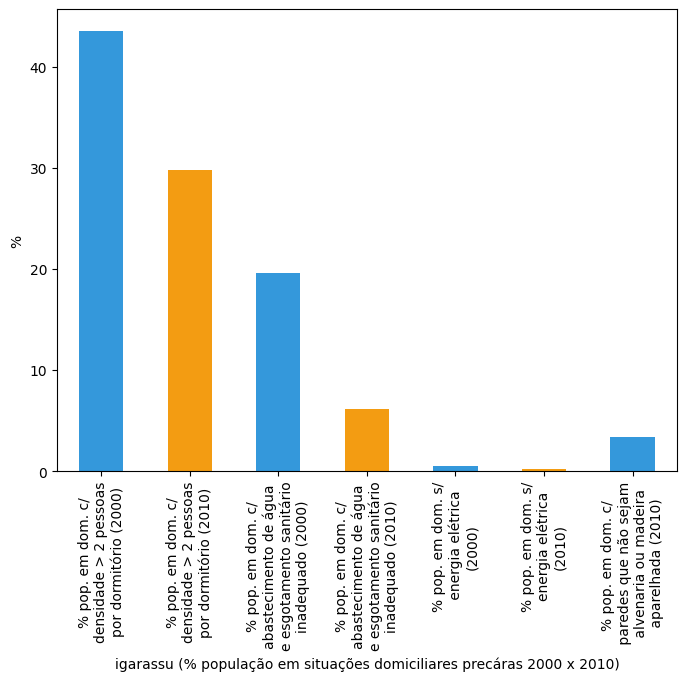

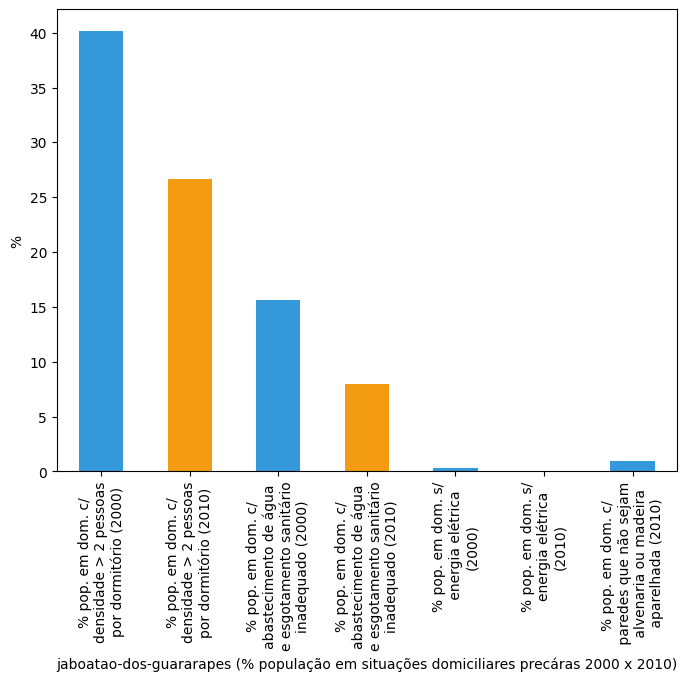

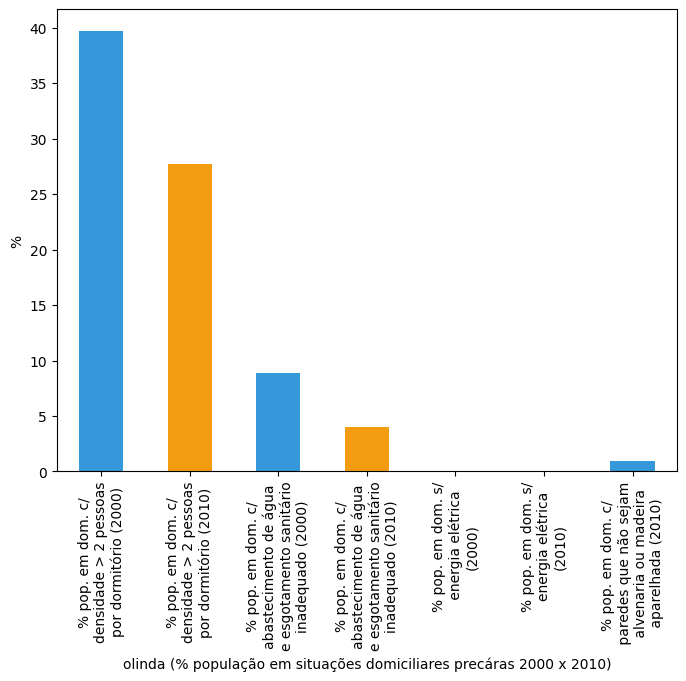

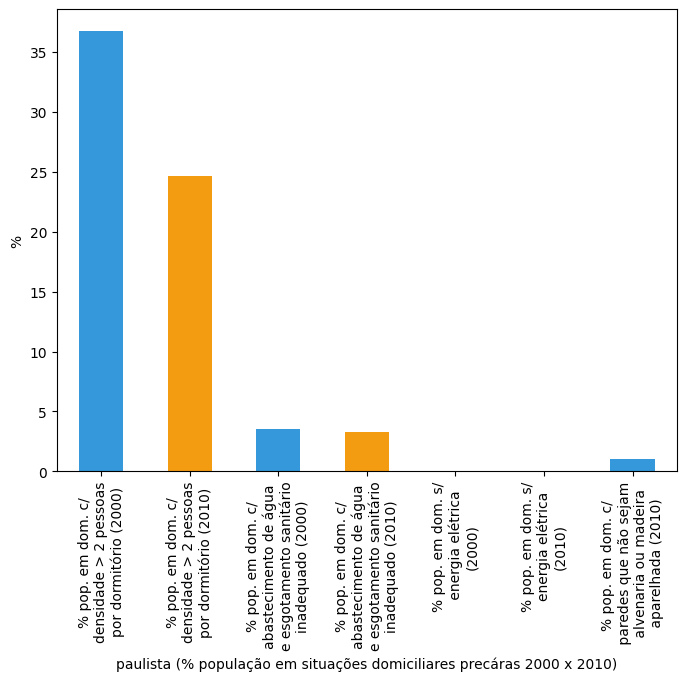

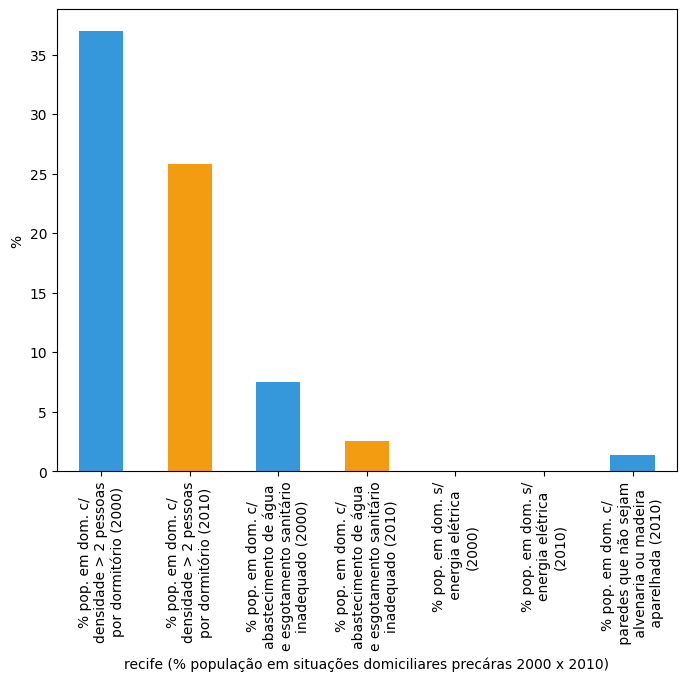

In [ ]:
# Gráfico Municipal DF_Domic_Prec:

# '% da população que vive em domicílios com densidade superior a 2 pessoas por dormitório 2000',
# '% da população que vive em domicílios com densidade superior a 2 pessoas por dormitório 2010'
# '% de pessoas em domicílios com abastecimento de água e esgotamento sanitário inadequados 2000',
# '% de pessoas em domicílios com abastecimento de água e esgotamento sanitário inadequados 2010'
# '% de pessoas em domicílios sem energia elétrica 2000',
# '% de pessoas em domicílios sem energia elétrica 2010'
# '% de pessoas em domicílios com paredes que não sejam de alvenaria ou madeira aparelhada 2010'


df = DF_Domic_Prec.copy()

var1 = '% da população que vive em domicílios com densidade superior a 2 pessoas por dormitório 2010'
var11 = '% da população que vive em domicílios com densidade superior a 2 pessoas por dormitório 2000'
var2 = '% de pessoas em domicílios com abastecimento de água e esgotamento sanitário inadequados 2010'
var22 = '% de pessoas em domicílios com abastecimento de água e esgotamento sanitário inadequados 2000'
var3 = '% de pessoas em domicílios sem energia elétrica 2010'
var33 = '% de pessoas em domicílios sem energia elétrica 2000'
var5 = '% de pessoas em domicílios com paredes que não sejam de alvenaria ou madeira aparelhada 2010' 

cols = [var11, var1, var22, var2, var33, var3, var5]

# Resume df necessário
df = df[['nome_municipio', var11, var1, var22, var2, var33, var3, var5]]
df = df[df['nome_municipio'].isin(Municipios)]
# Converte dtype das colunas para números
df[cols] = df[cols].apply(lambda x: pd.to_numeric(x, errors = 'coerce'))

# Renomeia nomes de colunas adicionando quebra de linhas
new_var1  = '% pop. em dom. c/\ndensidade > 2 pessoas\npor dormitório (2010)'
new_var11 = '% pop. em dom. c/\ndensidade > 2 pessoas\npor dormitório (2000)'
new_var2  = '% pop. em dom. c/\nabastecimento de água\ne esgotamento sanitário\ninadequado (2010)'
new_var22 = '% pop. em dom. c/\nabastecimento de água\ne esgotamento sanitário\ninadequado (2000)'
new_var3  = '% pop. em dom. s/\nenergia elétrica\n(2010)'
new_var33 = '% pop. em dom. s/\n energia elétrica\n(2000)'
new_var5  = '% pop. em dom. c/\n paredes que não sejam\n alvenaria ou madeira\n aparelhada (2010)' 

df.rename({
var1 : new_var1,
var11: new_var11,
var2 : new_var2,
var22: new_var22,
var3 : new_var3,
var33: new_var33,
var5 : new_var5,
        }, axis = 1, inplace = True)

# Define set_munic como apenas os que constam em 'nome_municipio' no df reduzido
set_munic = set(df['nome_municipio'].tolist())

# Define valores das cores das barras para o gráfico
blue   = '#3498db'
yellow = '#f39c12'

# Loop produz gráficos para cada município no DF
for munic in Municipios:
        dfx = df

        # Filter df with munic
        dfx = dfx[dfx['nome_municipio'] == munic]
        dfx.set_index('nome_municipio')

        # Define colors for the bars
        colors = [blue, yellow] * 4

        # Plot the bar graph
        ax = dfx.iloc[0, 1:].plot(kind='bar', color=colors, figsize=(8, 6))

        # Set the x and y axis labels
        ax.set_xlabel(f'{munic} (% população em situações domiciliares precáras 2000 x 2010)')
        ax.set_ylabel('%')

        # Save plot to save_path
        plt.savefig(f'{save_path}\\Bar_% população em situações domiciliares precárias 2000 x 2010_{munic}', dpi = 300, bbox_inches='tight' )

        # Show the plot
        plt.show()



#### Plots: DF_Prop_Pop_Sem_Saneamento_SNIS2017_91_10_AL_BA_PE

Gráfico Municipal População atendida por rede de esgoto 2017


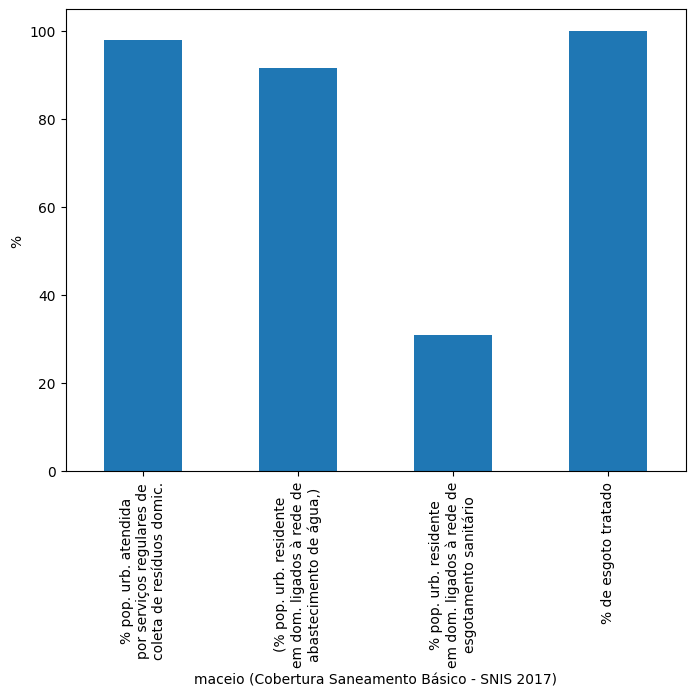

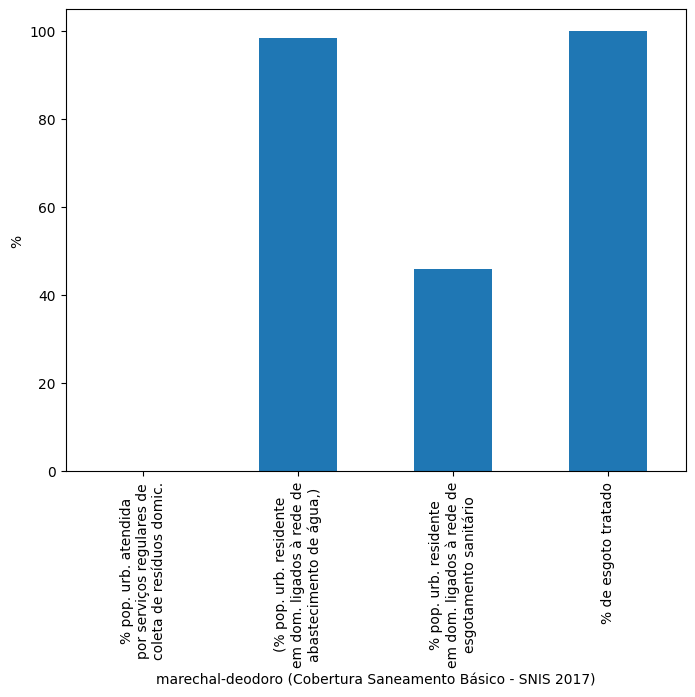

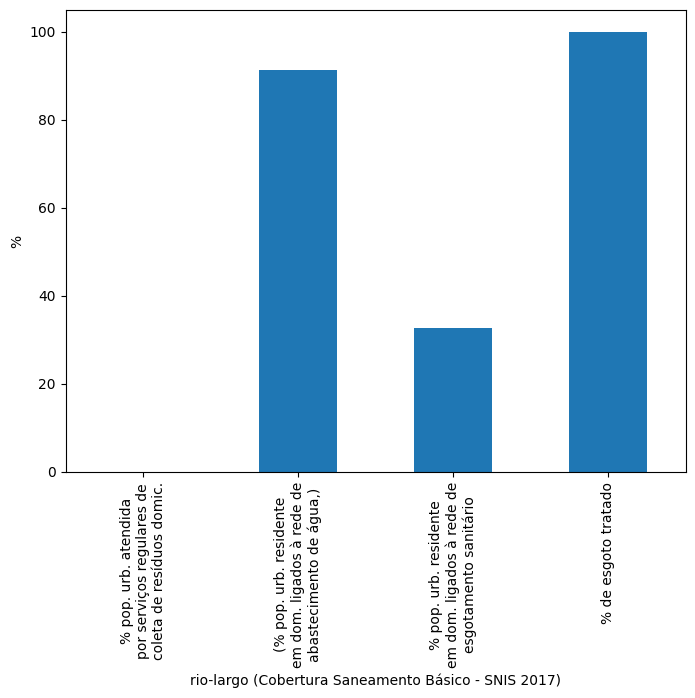

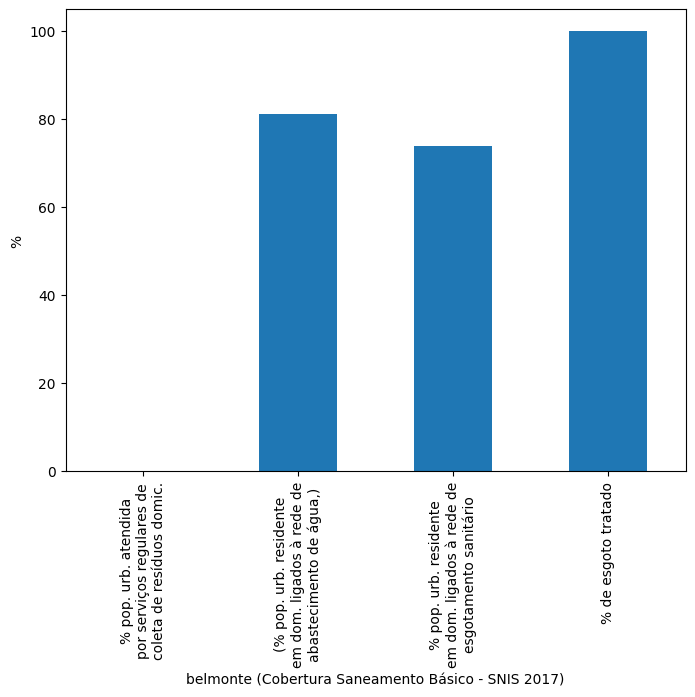

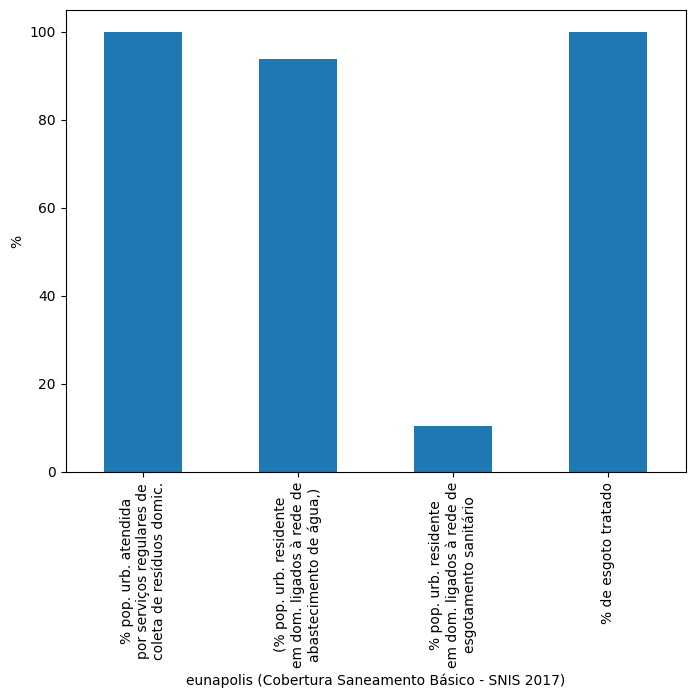

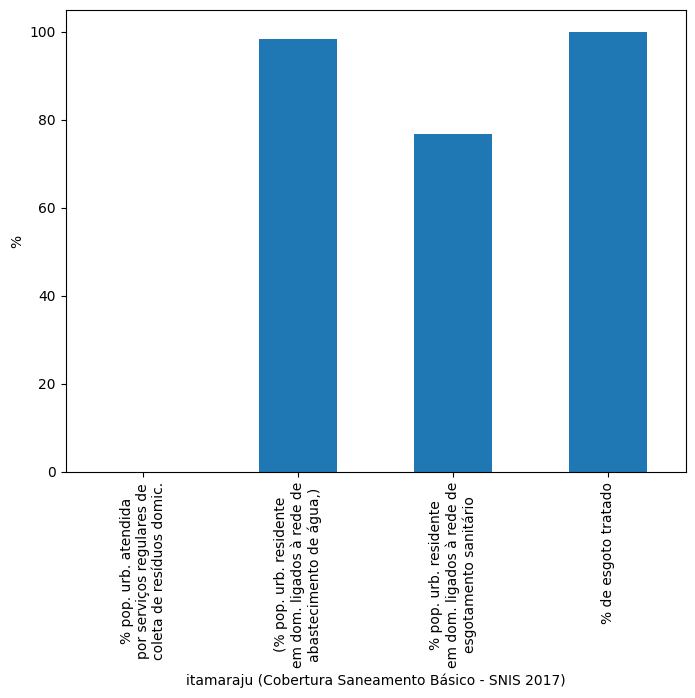

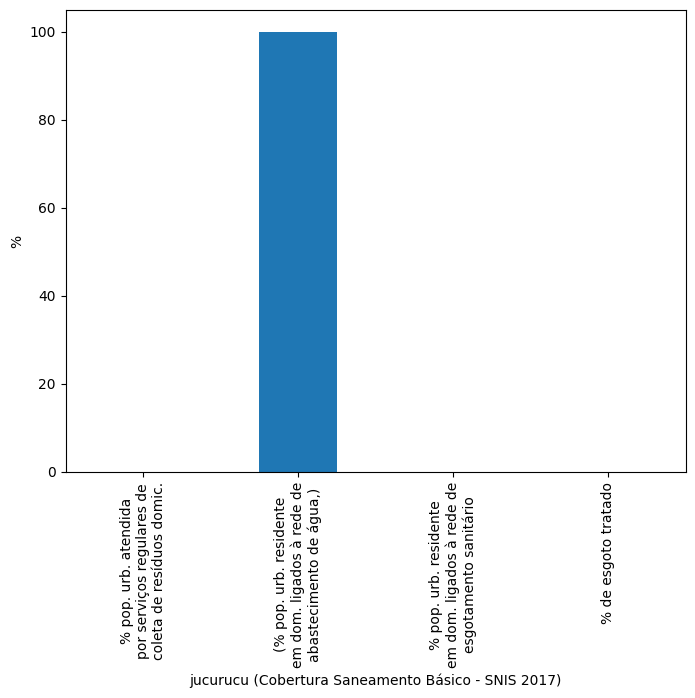

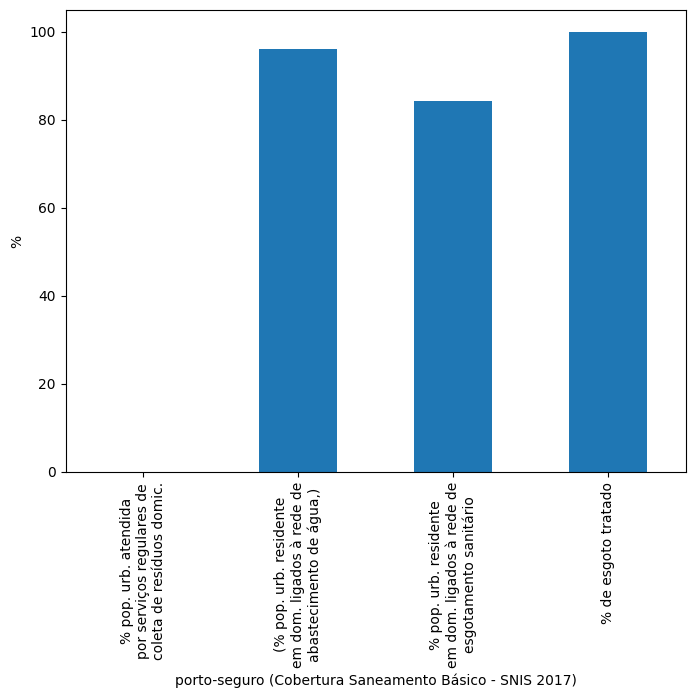

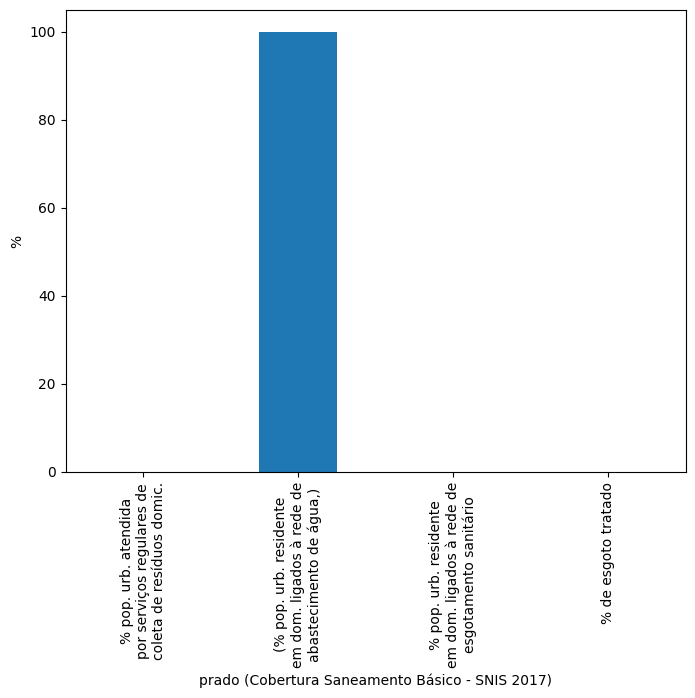

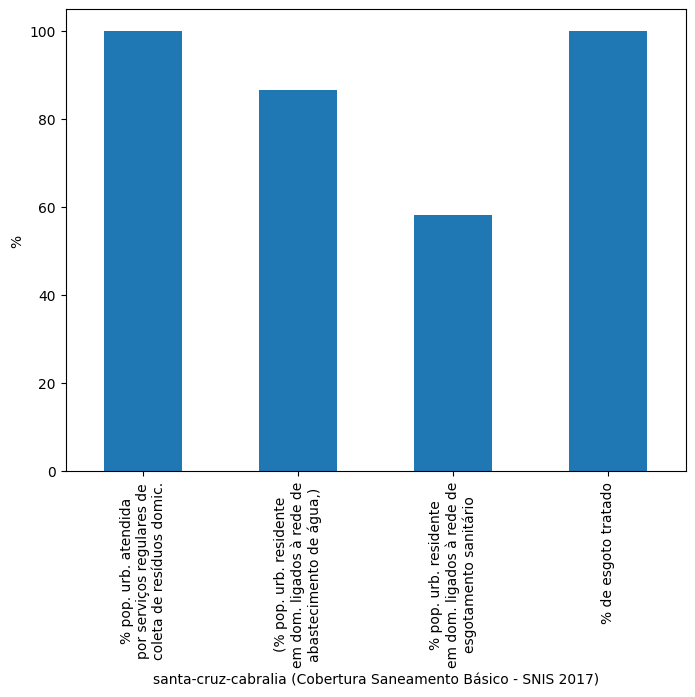

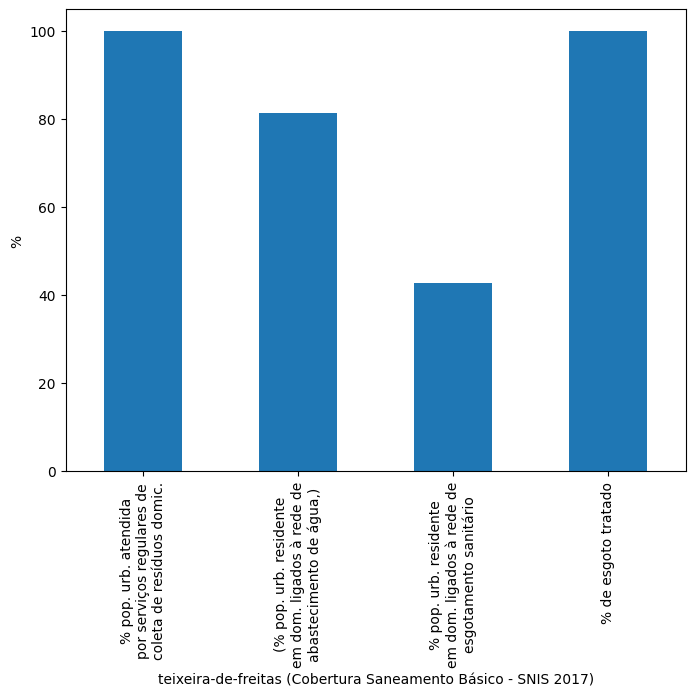

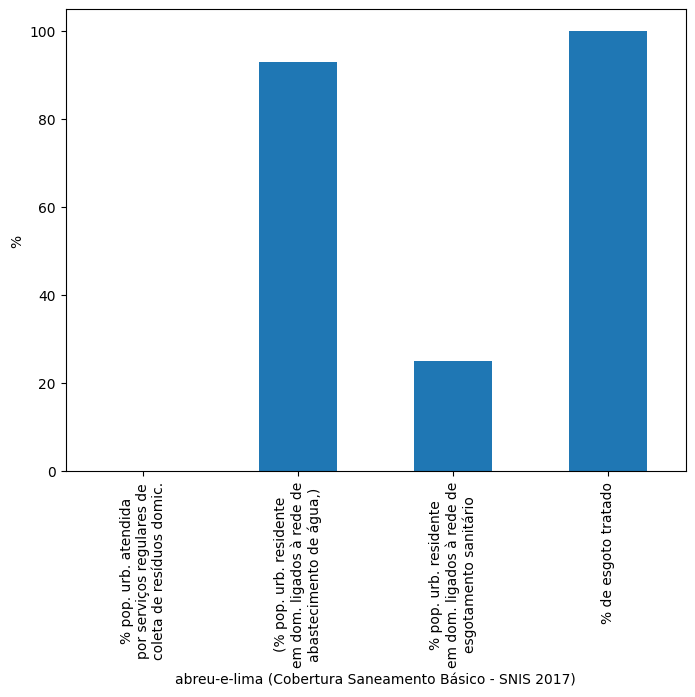

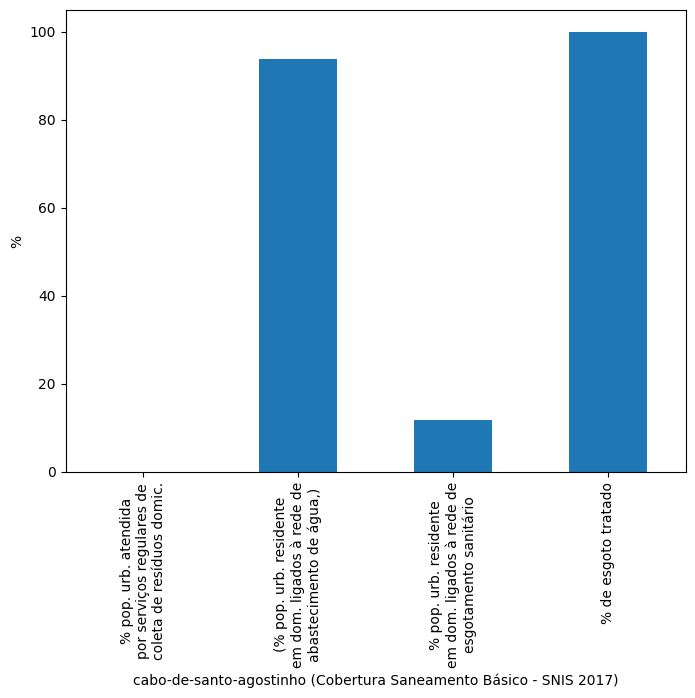

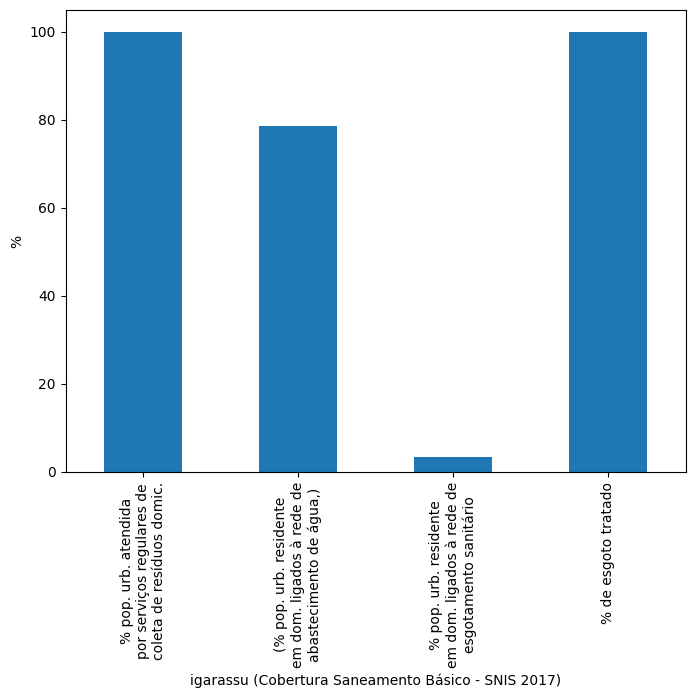

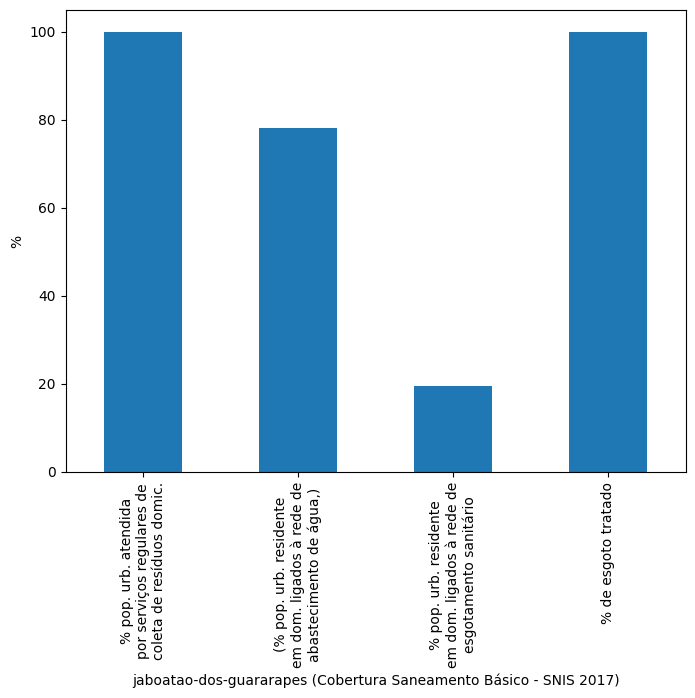

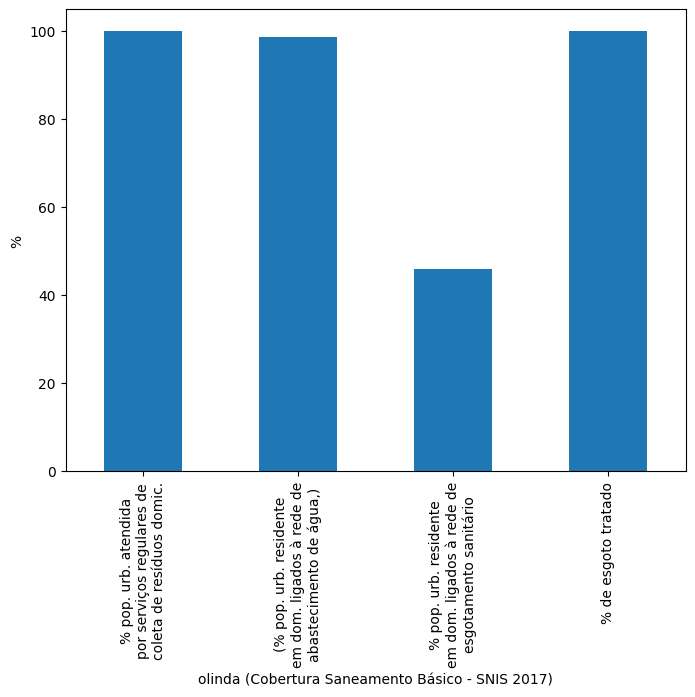

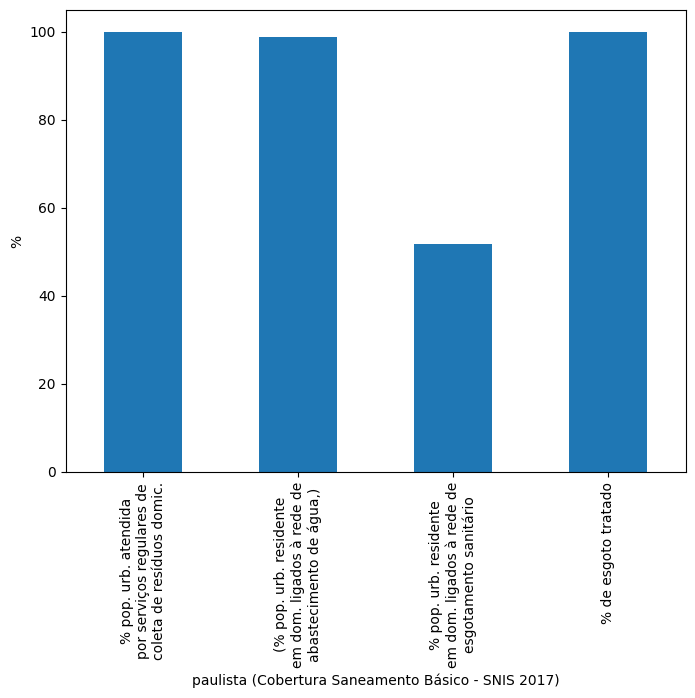

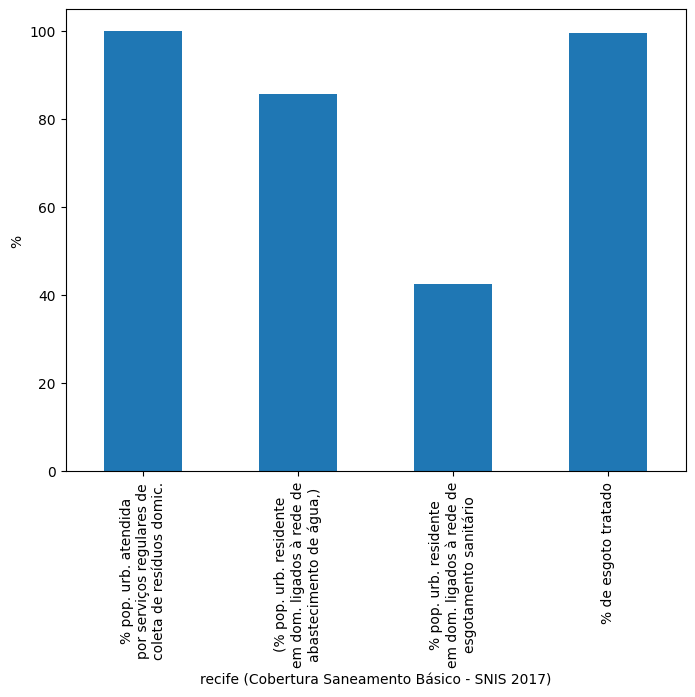

In [ ]:
# Gráfico:
'% da população urbana atendida por serviços regulares de coleta de resíduos domiciliares 2017',
'% da população urbana residente em domicílios ligados à rede de abastecimento de água 2017',
'% da população urbana residente em domicílios ligados à rede de esgotamento sanitário 2017',
'% de esgoto tratado 2017'



df = DF_Prop_Pop_Sem_Saneamento_SNIS2017_91_10_AL_BA_PE.copy()

var1 = '% da população urbana atendida por serviços regulares de coleta de resíduos domiciliares 2017'
var2 = '% da população urbana residente em domicílios ligados à rede de abastecimento de água 2017'
var3 = '% da população urbana residente em domicílios ligados à rede de esgotamento sanitário 2017'
var4 = '% de esgoto tratado 2017'

cols = [var1, var2, var3,  var4]

# Resume df necessário
df = df[['nome_municipio', var1, var2, var3,  var4]]
df = df[df['nome_municipio'].isin(Municipios)]

# Converte dtype das colunas para números
df[cols] = df[cols].apply(lambda x: pd.to_numeric(x, errors = 'coerce'))

# Renomeia nomes de colunas adicionando quebra de linhas
new_var1  = '% pop. urb. atendida\npor serviços regulares de\ncoleta de resíduos domic.'
new_var2  = '% pop. urb. residente\nem dom. ligados à rede de\nabastecimento de água',
new_var3  = '% pop. urb. residente\nem dom. ligados à rede de\nesgotamento sanitário'
new_var4  = '% de esgoto tratado'

df.rename({
var1 : new_var1,
var2 : new_var2,
var3 : new_var3,
var4 : new_var4,
        }, axis = 1, inplace = True)

cols = [new_var1, new_var2, new_var3, new_var4]       

# Define set_munic como apenas os que constam em 'nome_municipio' no df reduzido
set_munic = set(df['nome_municipio'].tolist())

# Loop produz gráficos para cada município no DF
for munic in Municipios:
        dfx = df

        # Filter df with munic
        dfx = dfx[dfx['nome_municipio'] == munic]
        dfx.set_index('nome_municipio')

        # Plot the bar graph
        ax = dfx.iloc[0, 1:].plot(kind='bar', figsize=(8, 6))

        # Set the x and y axis labels
        ax.set_xlabel(f'{munic} (Cobertura Saneamento Básico - SNIS 2017)')
        ax.set_ylabel('%')

        # Save plot to save_path
        # plt.savefig(f'{save_path}\\Bar_% da população atendida por rede de esgoto SNIS 2017_{munic}')

        # Show the plot
        plt.show()

#### Plots: DF_Aglomerados_Subnormais_Municipios.
(Há 4 Nulos entre os Municípios. Os municípios 'belmonte', 'jucurucu', 'prado',  'santa-cruz-cabralia
não possuem estimativas para domicílios em AGSN.)

Gráfico Comparado Total de Domicílios x Total Domicílios em AGSN

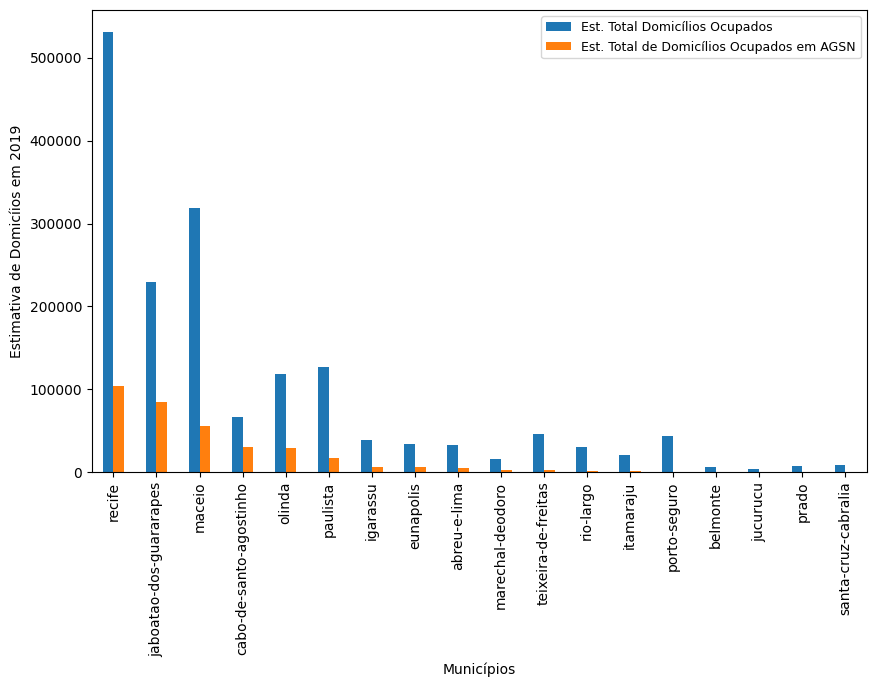

In [ ]:
# Gráfico 'Est. Total Domicílios Ocupados 2019' x 'Est. Total de Domicílios Ocupados em AGSN'
#! 'belmonte', 'jucurucu', 'prado',  'santa-cruz-cabralia' = NaNs

df = DF_Aglomerados_Subnormais_Municipios.copy()

var1 = 'Est. Total Domicílios Ocupados 2019'
var2 = 'Est. Total de Domicílios Ocupados em AGSN'

cols = [var1, var2]

# Resume df necessário
df = df[['nome_municipio', var1, var2]]

df = df[df['nome_municipio'].isin(Municipios)]

# Converte dtype das colunas para números
df[cols] = df[cols].apply(lambda x: pd.to_numeric(x, errors = 'coerce') )

# Renomeia nomes de colunas adicionando quebra de linhas
new_var1 = 'Est. Total Domicílios Ocupados'
new_var2 = 'Est. Total de Domicílios Ocupados em AGSN'

df.rename({
        var1: new_var1,
        var2: new_var2
        }, axis = 1, inplace = True)

# Reatribui nomes às variáveis
var1 = new_var1
var2 = new_var2
cols = [var1, var2]

# Reordena colunas
df = df.sort_values(var2, ascending = False)

df.plot(
        x = 'nome_municipio',
        y = cols,
        kind = 'bar',
        legend = True
        )
plt.xlabel('Municípios')
plt.ylabel('Estimativa de Domicíios em 2019')
plt.legend(loc='best', prop = {'size' :9})

save_graph('Total de Domicílios x Total Domicílios em AGSN', 'Municipios')

Gráfico Comparado % Domicílios em AGSN

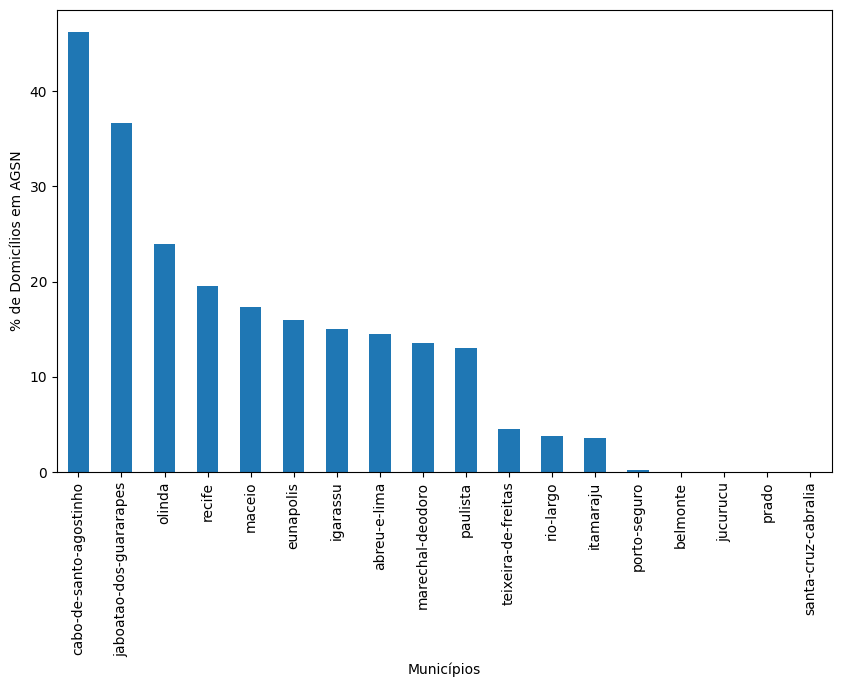

In [ ]:
# Gráfico '% de Domicílios em AGSN'
#! 'belmonte', 'jucurucu', 'prado',  'santa-cruz-cabralia' NaNs

df = DF_Aglomerados_Subnormais_Municipios.copy()

var = '% de Domicílios em AGSN'

cols = [var]

# Resume df necessário
df = df[['nome_municipio', var]]
df = df[df['nome_municipio'].isin(Municipios)]

# Converte dtype das colunas para números
df[cols] = df[cols].apply(lambda x: pd.to_numeric(x, errors = 'coerce') )

df = df.sort_values(var, ascending = False)

df.plot(
        x = 'nome_municipio',
        y = var,
        kind = 'bar',
        legend = False
        )
plt.xlabel('Municípios')
plt.ylabel(var)

save_graph('Bar_% Domicílios em AGSN', 'Municipios')

Gráfico Pie Chart Municipal AGSN% Domicílios em AGSN

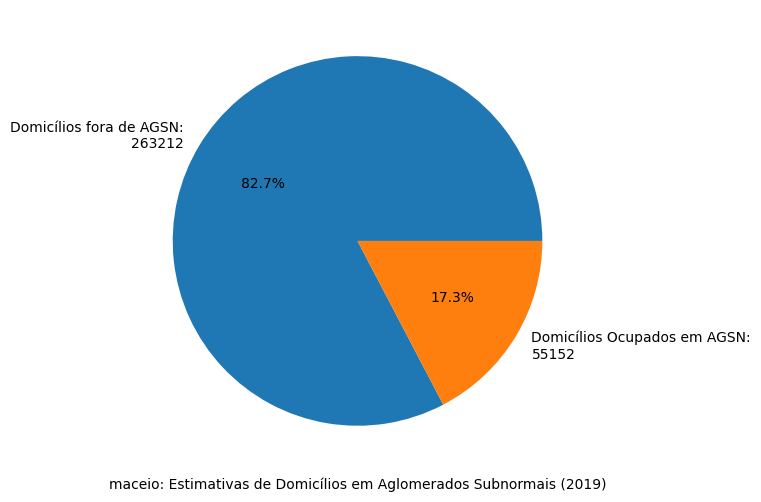

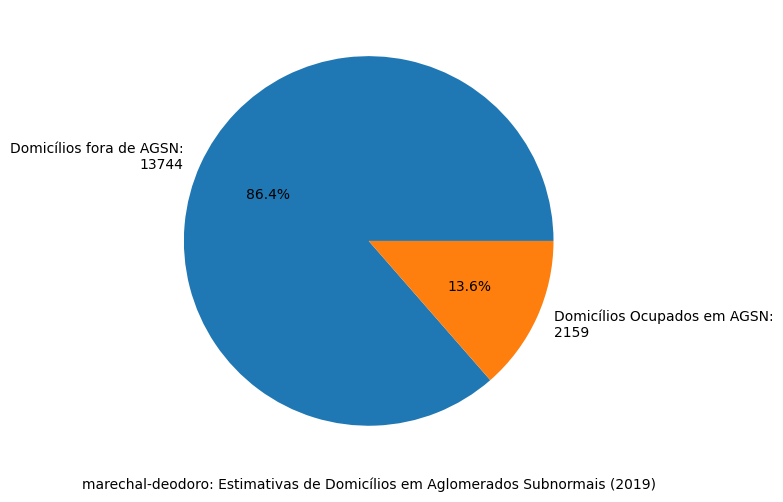

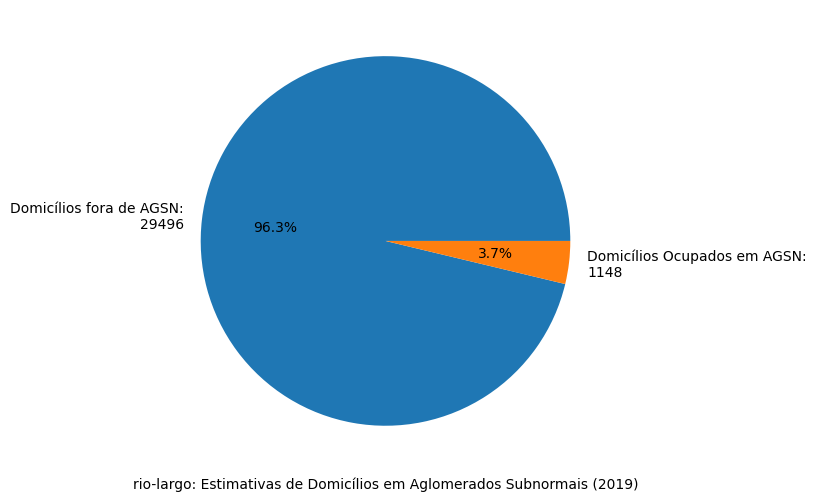

Não há valores parabelmonteMunicipio adicionado em Errors_list


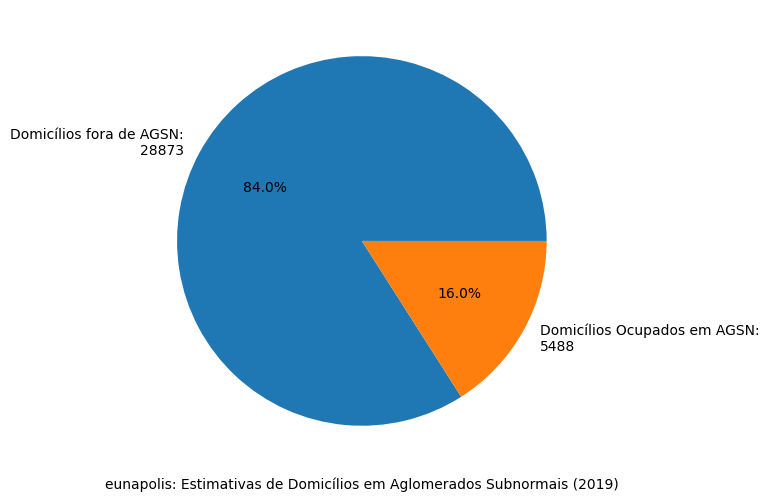

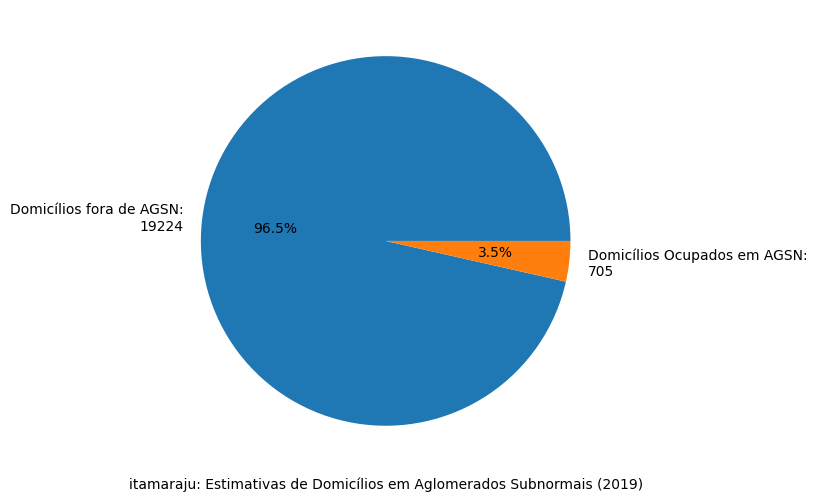

Não há valores parajucurucuMunicipio adicionado em Errors_list


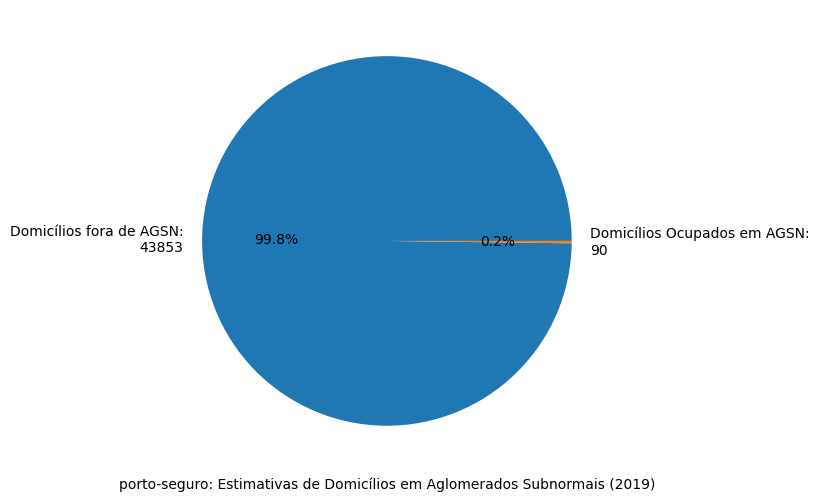

Não há valores parapradoMunicipio adicionado em Errors_list
Não há valores parasanta-cruz-cabraliaMunicipio adicionado em Errors_list


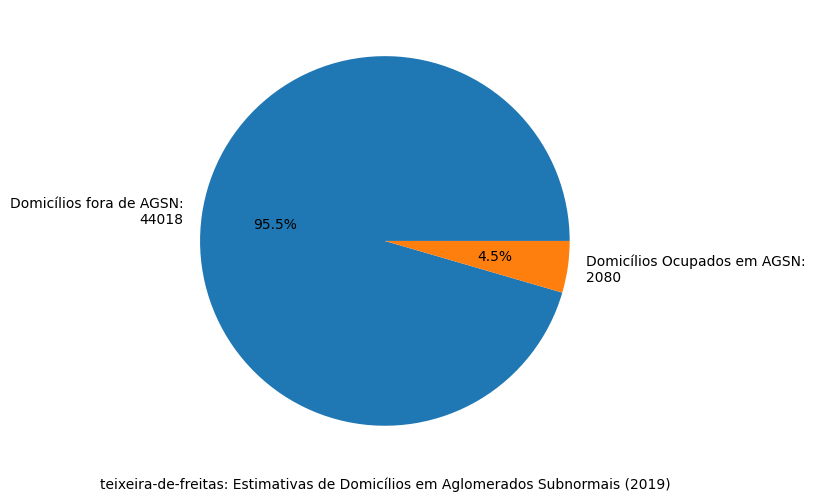

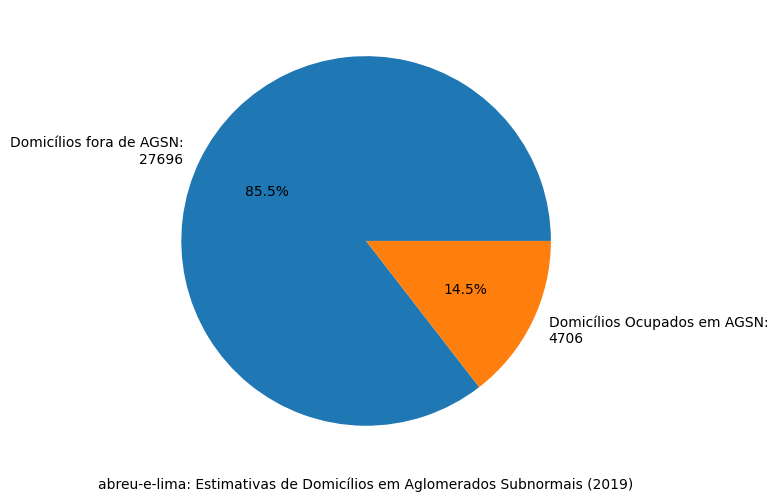

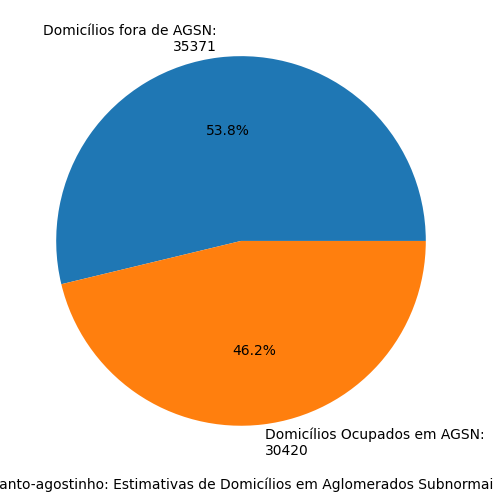

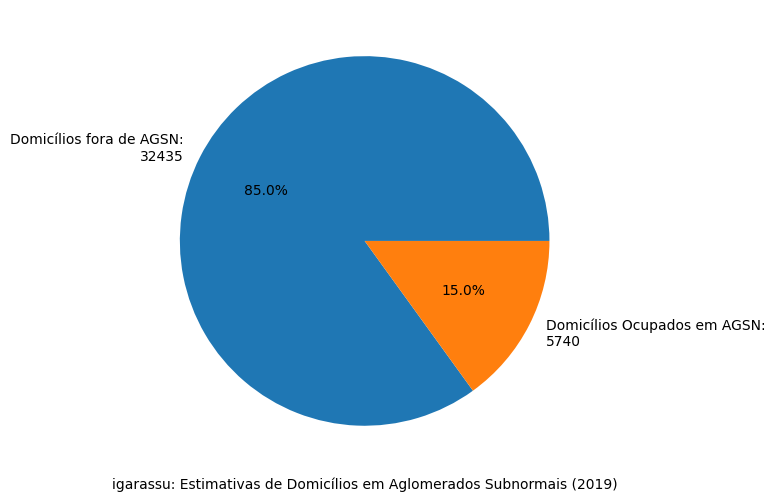

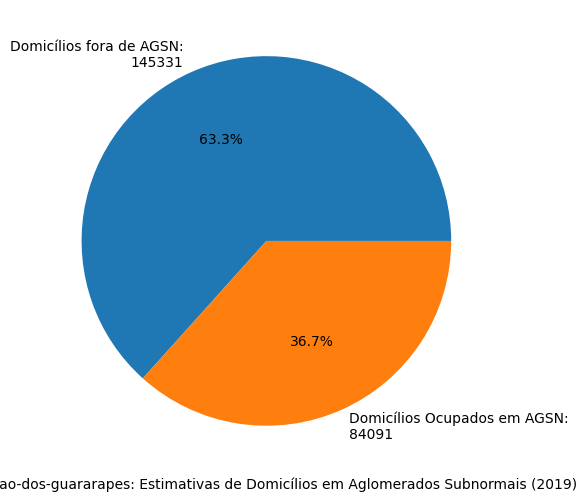

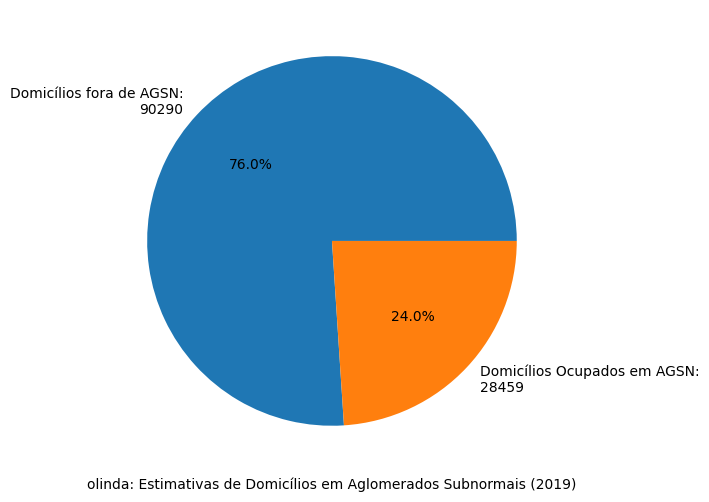

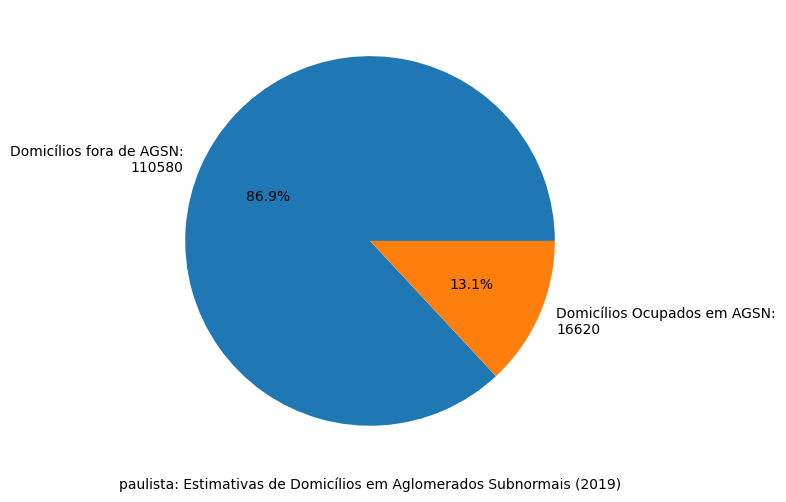

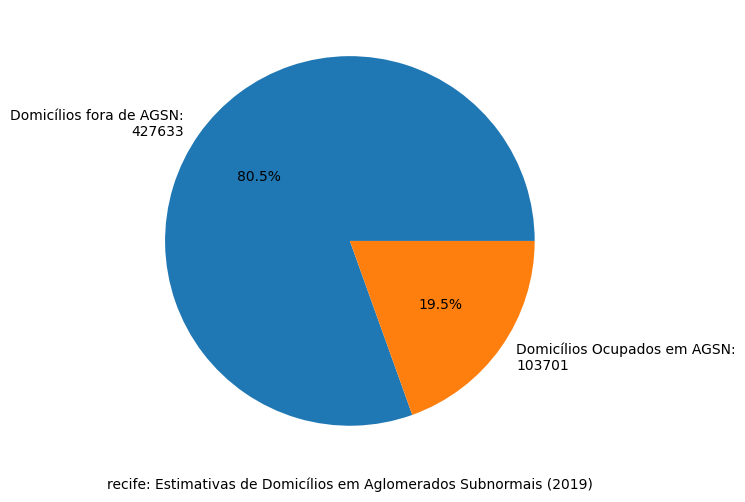

In [ ]:
# Gráfico 'Est. Total Domicílios Ocupados 2019' x 'Est. Total de Domicílios Ocupados em AGSN'
#! 'belmonte', 'jucurucu', 'prado',  'santa-cruz-cabralia' NaNs

df = DF_Aglomerados_Subnormais_Municipios.copy()

var1 = 'Est. Total Domicílios Ocupados 2019'
var2 = 'Est. Total de Domicílios Ocupados em AGSN'

cols = [var1, var2]

# Resume df necessário
df = df[['nome_municipio', var1, var2]]

df = df[df['nome_municipio'].isin(Municipios)]

# Converte dtype das colunas para números
df[cols] = df[cols].apply(lambda x: pd.to_numeric(x, errors = 'coerce') )

# Renomeia nomes de colunas adicionando quebra de linhas
new_var1 = 'Est. Total Domicílios Ocupados'
new_var2 = 'Est. Total de Domicílios Ocupados em AGSN'

df.rename({
        var1: new_var1,
        var2: new_var2
        }, axis = 1, inplace = True)

# Reatribui nomes às variáveis
var1 = new_var1
var2 = new_var2
cols = [var1, var2]

# Loop de criação dos pie charts para pop_situ_domic_df
set_munic = set(df['nome_municipio'].tolist())

df['Est. Total Domicílios fora de AGSN'] = df.apply(lambda row: row[var1] - row[var2], axis = 1)

df['Est. Total Domicílios Ocupados'].dtype

for i, row in df.iterrows():
        try:
                dfx = df[['Est. Total Domicílios fora de AGSN', 'Est. Total de Domicílios Ocupados em AGSN']]
                percents = dfx.iloc[i] / df['Est. Total Domicílios Ocupados'].iloc[i]
                label1 = f'Domicílios fora de AGSN:\n{round(df["Est. Total Domicílios fora de AGSN"].iloc[i])}'
                label2 = f'Domicílios Ocupados em AGSN:\n{round(df["Est. Total de Domicílios Ocupados em AGSN"].iloc[i])}'
                labels=[label1, label2]
                sizes = percents.values
                plt.pie(sizes, labels=labels, autopct='%1.1f%%')
        except:
                print(f'Não há valores para' + row['nome_municipio'] + 'Municipio adicionado em Errors_list')
                Errors_list.append(row['nome_municipio'])
        else:
                plt.xlabel(row['nome_municipio']+': Estimativas de Domicílios em Aglomerados Subnormais (2019)')
                plt.savefig(f'{save_path}\\Pie_% Domicilios em AGSN 2019_{row["nome_municipio"]}.png')
                plt.show()
        


